# **Lors de la phase de préparation des données, le fichier Student_derpression_dataset.csv a été importé et exploré afin de vérifier sa structure et la cohérence des informations qu’il contient.**
# **Les premières étapes ont consisté à supprimer les colonnes non pertinentes, à traiter les valeurs manquantes et à corriger les éventuelles incohérences dans les types de données. Les variables catégorielles ont été normalisées et les doublons ont été éliminés pour garantir la qualité du jeu de données.**
# **Cette étape de nettoyage et de transformation des données est essentielle pour obtenir un ensemble exploitable, fiable et prêt à être utilisé pour les analyses statistiques et la modélisation prédictive liées à l’étude de la dépression.**

# **1. Compréhension des données :**


In [ ]:
# importation des bibliotheques
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#lire le fichier (.csv)
set = pd.read_csv('sample_data/student_depression_dataset.csv')

In [ ]:
# Afficher les colonnes du dataset
set.columns


Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
# Afficher les 5 premières lignes du DataFrame
set.head()

id  Gender   Age      City  Profession  Academic Pressure  \
0   89842.0  Female  26.3      Agra     Student             4.9375   
1  119359.0  Female  25.6    Meerut     Student             5.2500   
2   59886.0    Male  27.0  Ludhiana     Student             4.6250   
3   10910.0    Male  32.9  Varanasi  Freelancer             5.1250   
4   68887.0    Male  28.8  Vadodara     Student             6.4375   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  7.53                 9.5               0.0   
1            0.0  8.08                 8.1               0.0   
2            0.0  6.47                 6.3               0.0   
3            0.0  8.02                 9.4               0.0   
4            0.0  8.05                 7.4               0.0   

      Sleep Duration Dietary Habits Degree  \
0          5-6 hours       Moderate    LLM   
1          7-8 hours        Healthy    BBA   
2  More than 8 hours        Healthy   B.Ed   
3  Less than 5 hours        Healthy     MD   
4          7-8 hours        Healthy     ME   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                    No               6.2              Low   
1                                    No               5.4              Low   
2                                    No               1.0           Medium   
3                                    No               1.0           Medium   
4                                    No               5.4             High   

  Family History of Mental Illness  Depression  
0                               No         0.0  
1                               No         0.0  
2                               No         0.0  
3                               No         0.0  
4                               No         0.0

In [ ]:
# Afficher les 5 dernières lignes du DataFrame
set.tail()

id  Gender   Age       City  Profession  Academic Pressure  \
34870  139323.000000    Male  20.1     Indore    Employee             6.1875   
34871  116163.000000    Male  25.7     Meerut     Student             4.8125   
34872  479431.875444  Female  26.7     Nashik    Employee             5.3750   
34873  110298.000000    Male  26.3    Lucknow  Freelancer             5.4375   
34874   75170.000000    Male  29.9  Ahmedabad    Employee             5.3125   

       Work Pressure       CGPA  Study Satisfaction  Job Satisfaction  \
34870            0.0  17.346885            6.200000          0.000000   
34871            0.0   8.680000            7.200000          0.000000   
34872            0.0  17.346885            4.900000          0.379358   
34873            0.0   8.680000           24.345029          0.379358   
34874            0.0   8.480000            9.100000          0.000000   

          Sleep Duration Dietary Habits  Degree  \
34870  More than 8 hours        Healthy     BCA   
34871          7-8 hours       Moderate  B.Arch   
34872          5-6 hours       Moderate    MBBS   
34873  More than 8 hours       Moderate  M.Tech   
34874          7-8 hours        Healthy      ME   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
34870                                    No          2.800000   
34871                                    No         25.967775   
34872                                   Yes         25.967775   
34873                                    No         25.967775   
34874                                    No          1.200000   

      Financial Stress Family History of Mental Illness  Depression  
34870              Low                               No    0.000000  
34871              Low                               No    0.000000  
34872             High                              Yes    5.522658  
34873           Medium                               No    0.000000  
34874           Medium                               No    0.000000

In [ ]:
#Afficher les statistiques descriptives des colonnes numériques du Dataset
set.describe()

id           Age  Academic Pressure  Work Pressure  \
count   33791.000000  33788.000000       33785.000000   33789.000000   
mean    81363.012049     24.466238           5.986858       0.000503   
std     76766.706924      7.655751           1.008819       0.048351   
min         2.000000     17.000000           3.000000       0.000000   
25%     36216.000000     20.500000           5.187500       0.000000   
50%     72727.000000     23.400000           6.062500       0.000000   
75%    108631.500000     26.500000           6.750000       0.000000   
max    479431.875444     64.290257           8.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  34875.000000        34875.000000      33787.000000      33783.000000   
mean       7.193493            5.733091          0.010789          5.040346   
std        1.964584            3.552985          0.076914          4.039432   
min        2.900000            1.000000          0.000000          1.000000   
25%        6.220000            3.800000          0.000000          2.900000   
50%        6.960000            5.200000          0.000000          4.500000   
75%        7.720000            6.900000          0.000000          6.100000   
max       17.346885           24.345029          4.000000         25.967775   

         Depression  
count  34875.000000  
mean       0.709710  
std        0.917618  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        5.522658

In [ ]:
#data shape (nbre de lignes et colonnes)
print(set.shape)

(34875, 18)


**Traitement des features inutiles**

In [ ]:
#supprimer la colonne id
set = set.drop(columns=["id"])

In [ ]:
#supprimer la colonne Work Pressure
set = set.drop(columns=["Work Pressure"])

In [ ]:
#supprimer la colonne Job Satisfaction
set = set.drop(columns=["Job Satisfaction"])

In [ ]:
#supprimer la colonne City
set = set.drop(columns=["City"])

Le dataset comporte des colonnes inutiles, qui n'ont aucune valeur ajoutée pour le modèle, il suffit de les enlever afin d’éviter d’introduire du bruit inutile.
- id : n’apporte aucune information utile pour l’analyse ou la prédiction, car elle ne contient pas de variable explicative réelle
- Work Pressure / Job Satisfaction : Toutes les lignes sont initialisées à 0, de plus le modèle se concentre sur des étudiants et pas des employés.
- City : Les noms de villes introduisent un risque de surapprentissage si le modèle les interprète comme des facteurs discriminants

**Traitement des lignes dupliquées**

In [ ]:
#Vérifier le nombre de lignes dupliquées dans le dataset
set.duplicated().sum()

np.int64(2648)

In [ ]:
#Suppression des lignes dupliquées dans le dataset
set.drop_duplicates(inplace=True)

In [ ]:
#Verification de la suppression
set.duplicated().sum()

np.int64(0)

# **2. Visualisation des données :**

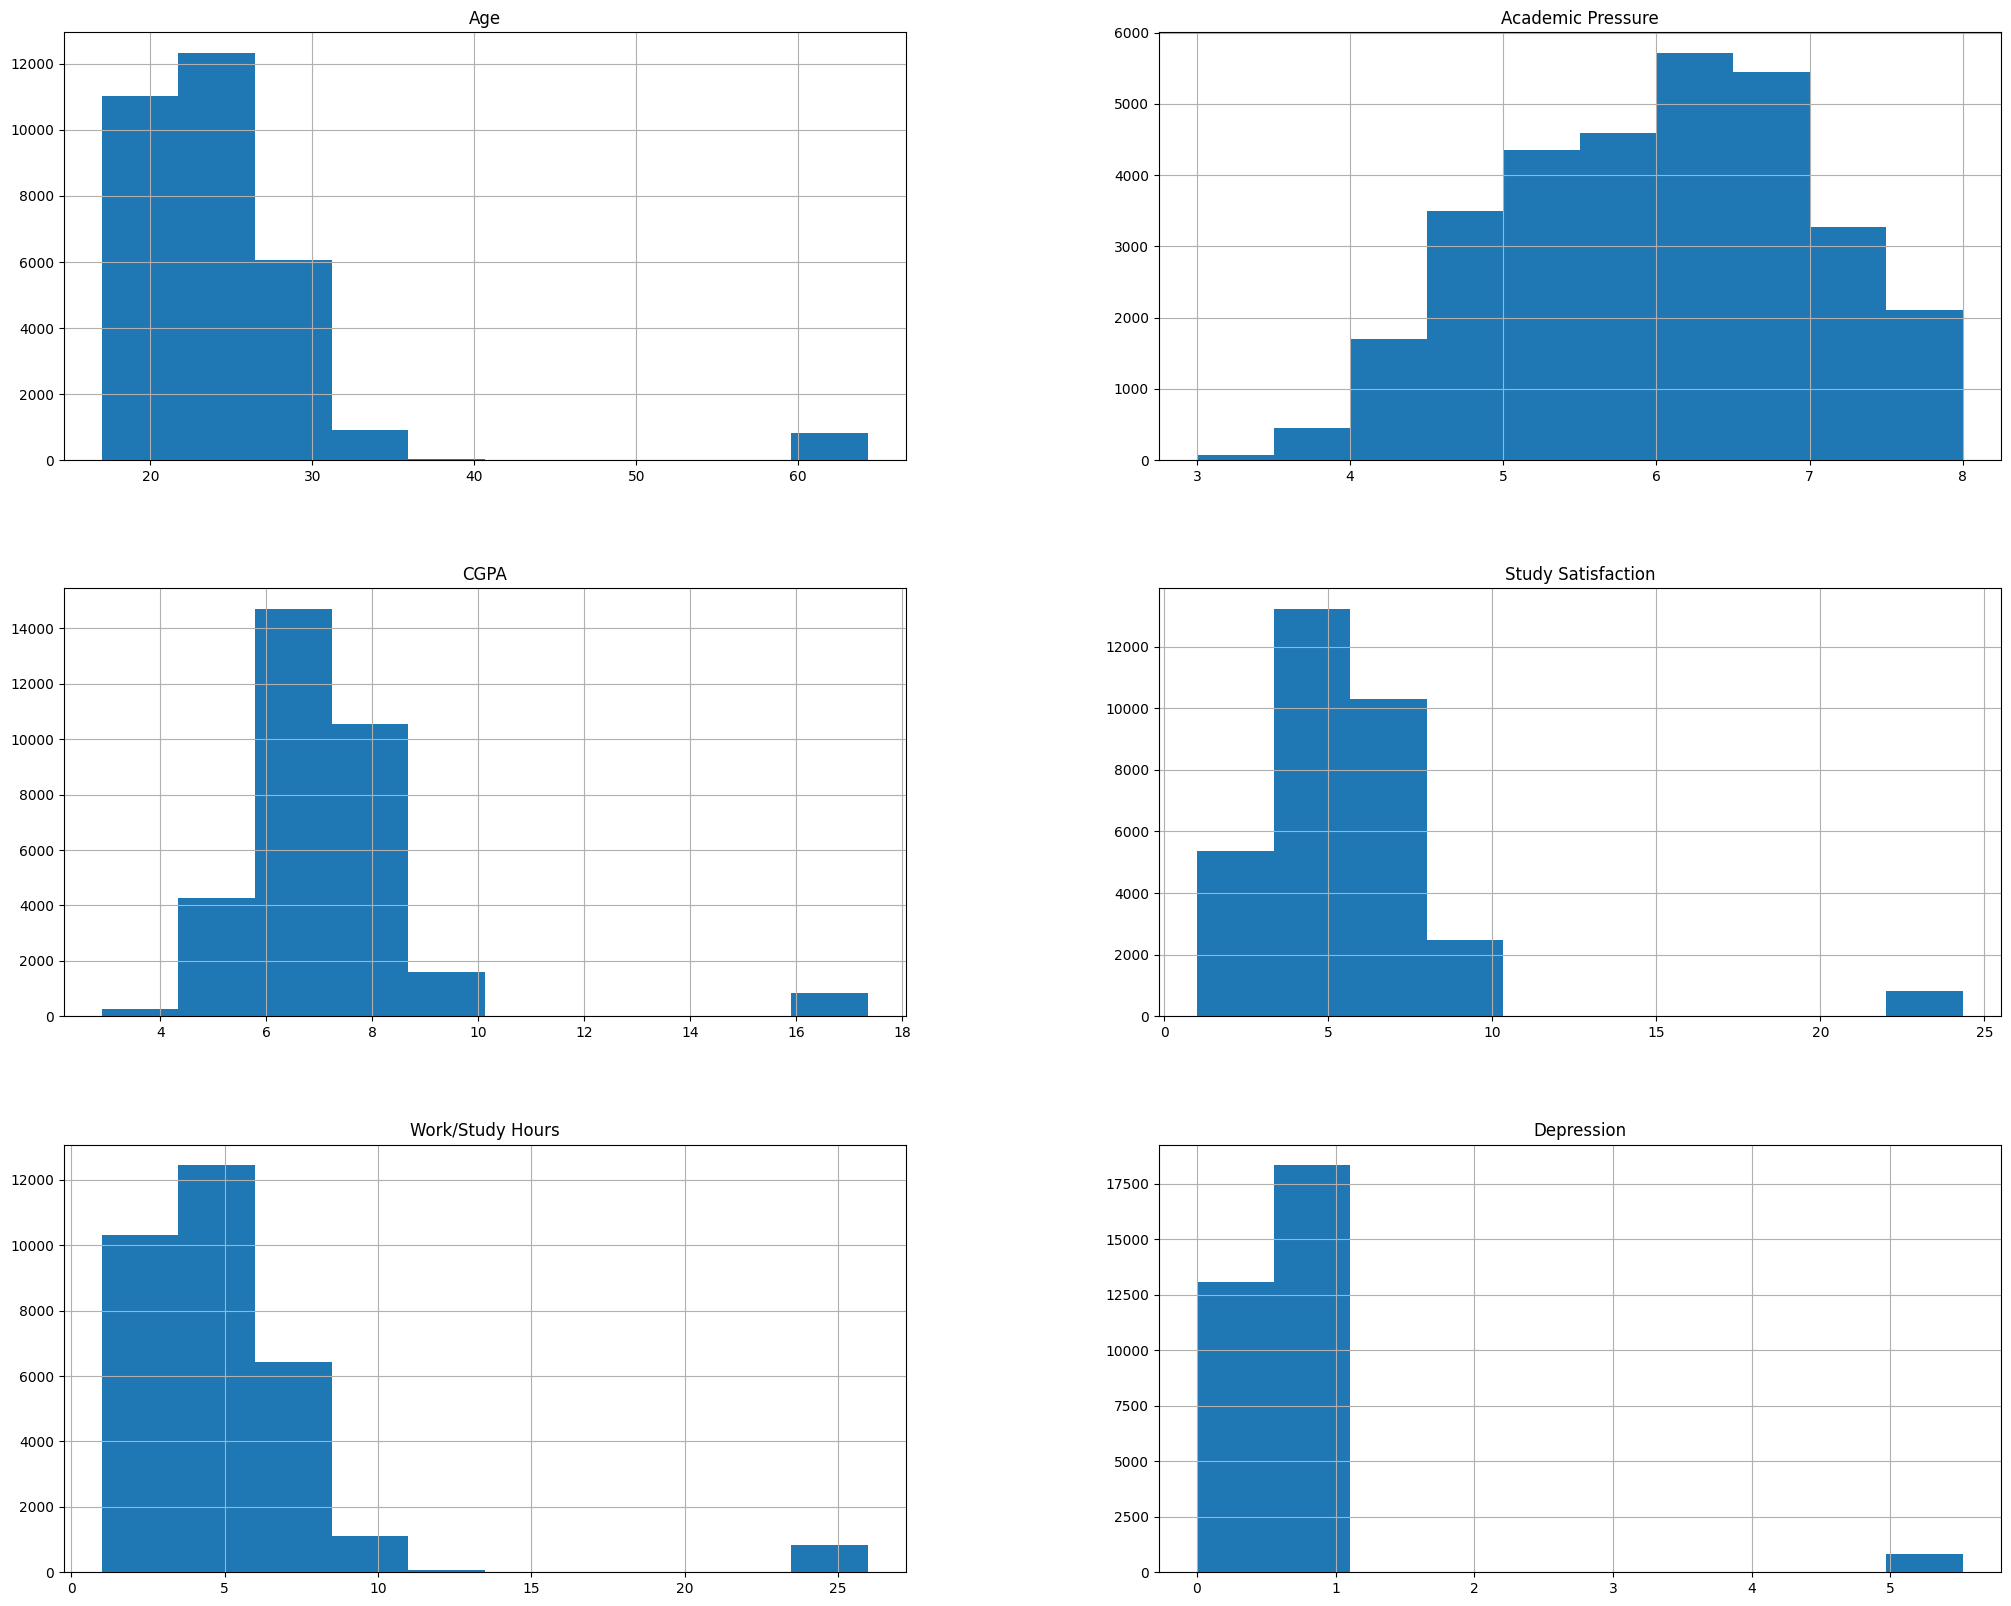

In [ ]:
# Affichage des Histogrammes
set.hist(figsize=(25,20))
plt.show()

# **3. Traitement des données pour chaque colonne :**

**Traitement de la colonne cible "Depression"**

In [ ]:
# Description de la colonne cible
set['Depression'].describe()

count    32227.000000
mean         0.709188
std          0.916226
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.522658
Name: Depression, dtype: float64

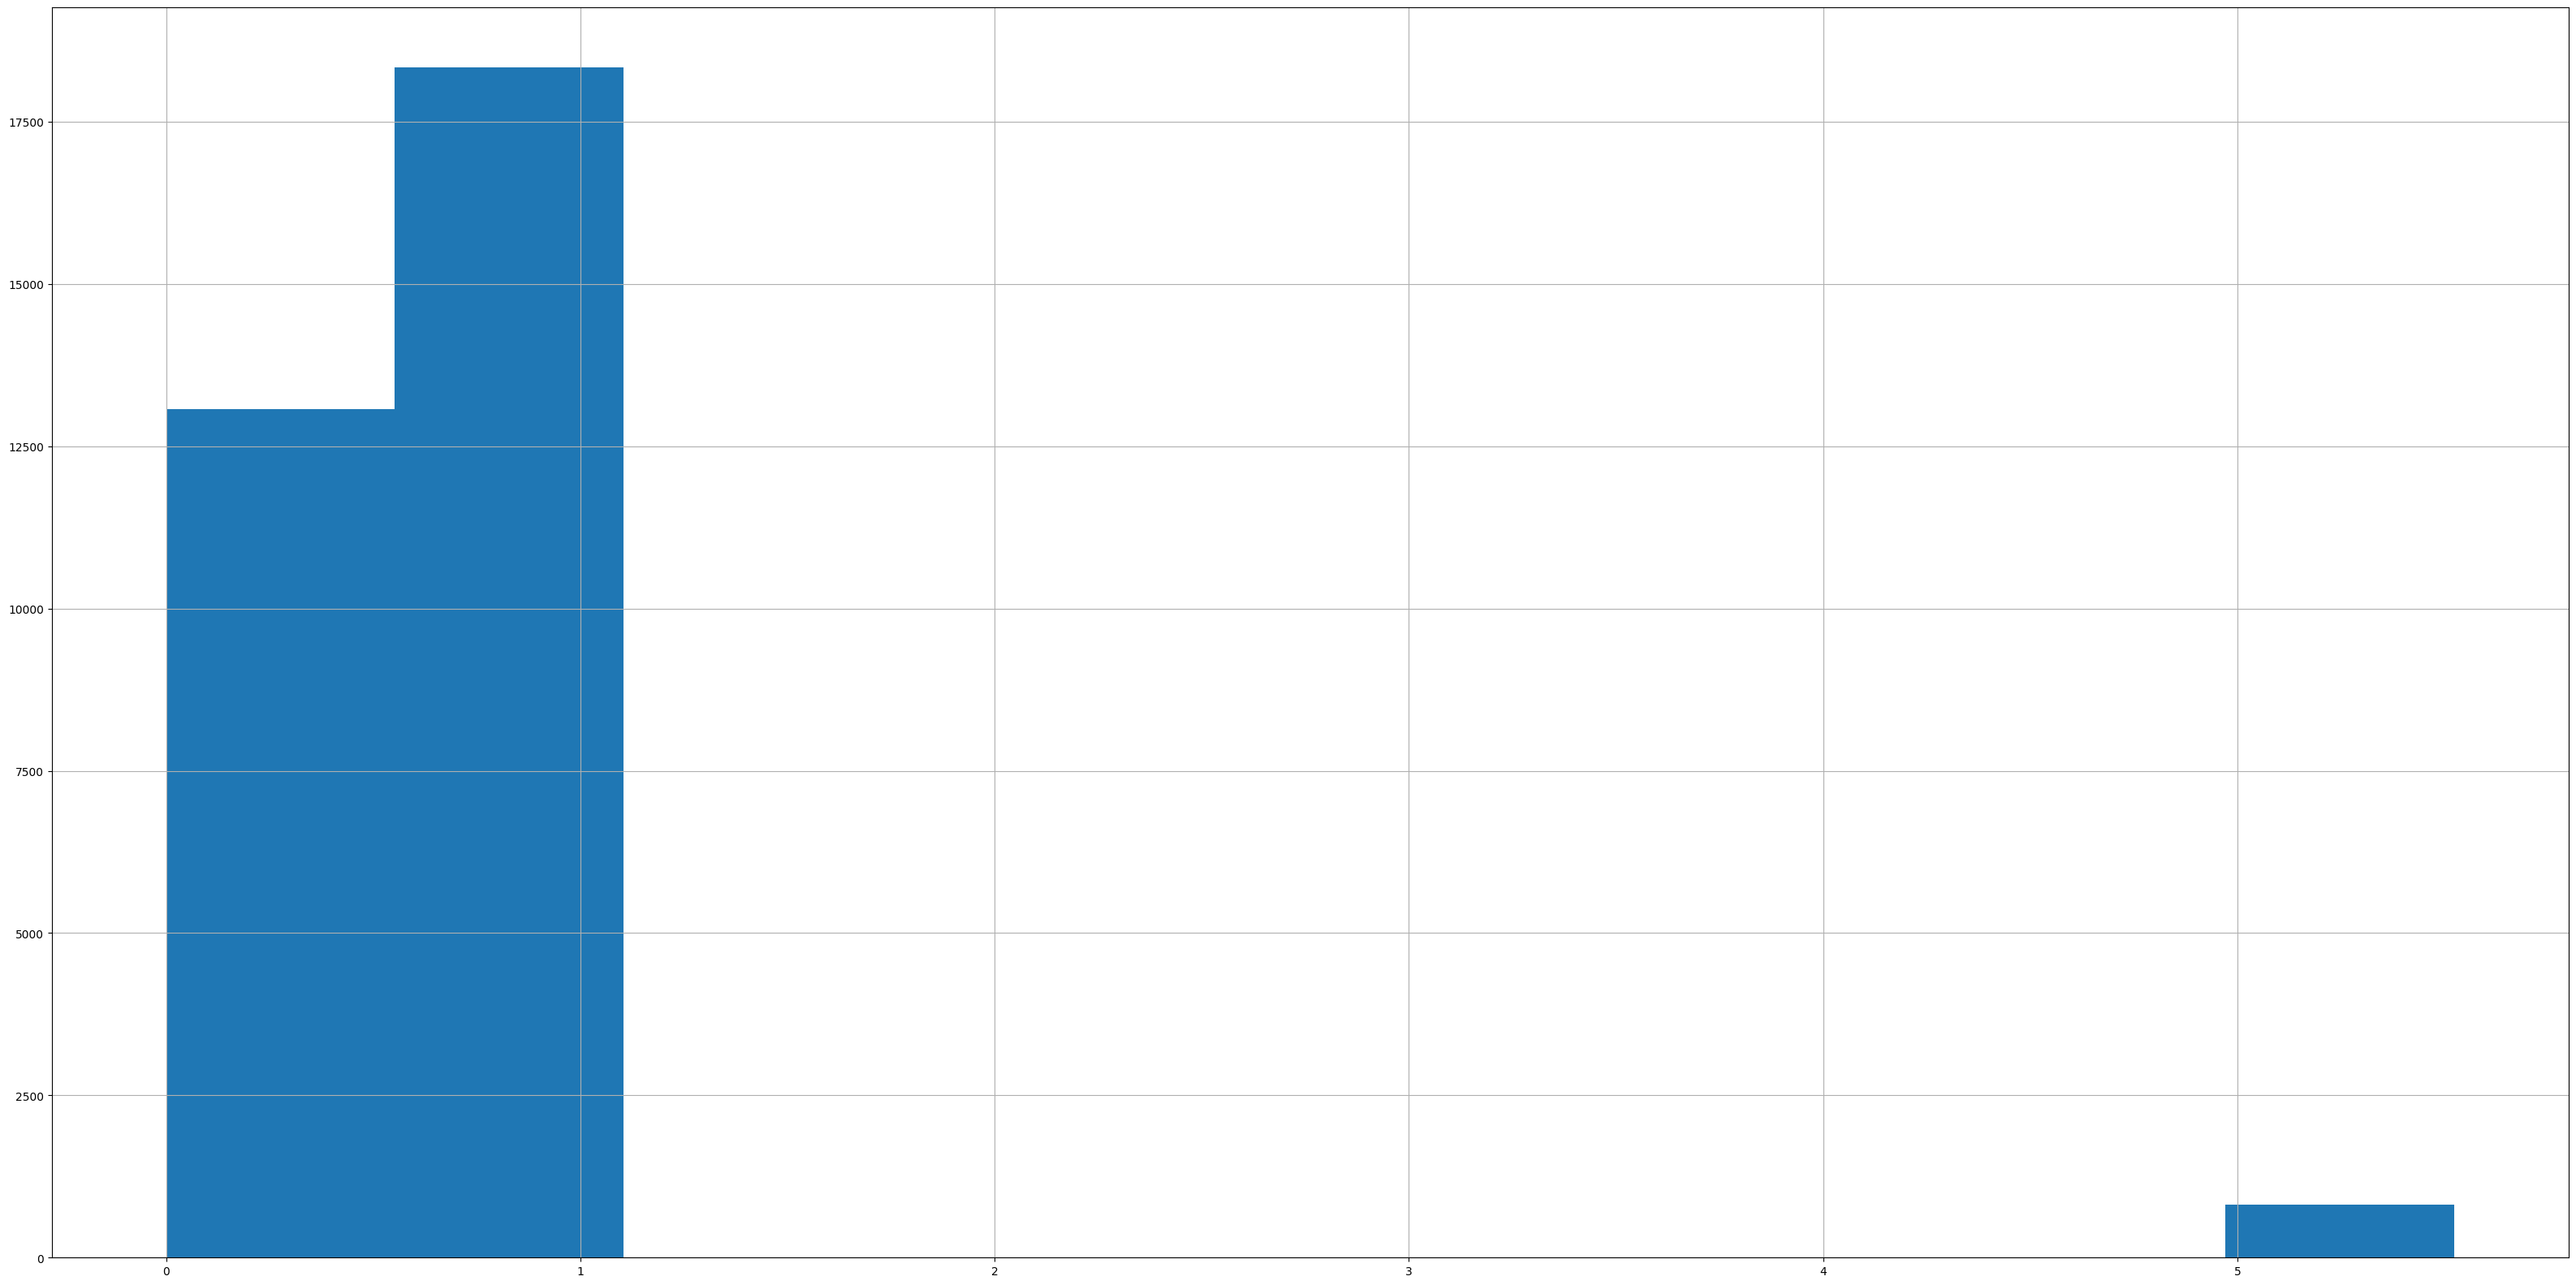

In [ ]:
#Histogramme pour la colonne 'Depression'
set['Depression'].hist(figsize=(40,20))
plt.show()


In [ ]:
# Afficher le nombre de chaque valeur unique dans la colonne 'Depression'
print(set['Depression'].value_counts())

Depression
1.000000    18343
0.000000    13067
5.522658      817
Name: count, dtype: int64


In [ ]:
#calculate the relative frequencies of unique values in the "Depression" column
set["Depression"].value_counts() / len(set) #len(set) → gives the total number of rows in "set"

Depression
1.000000    0.569181
0.000000    0.405467
5.522658    0.025351
Name: count, dtype: float64

La colonne cible ne devra présenter que des valeurs binaires (1 ou 0), sauf que dans ce cas, elle affiche des valeurs de 5.522658 ce qui est incohérent.
C'est pourquoi il faut forcer ces valeurs à une valeur nulle (NaN) et les traiter après avec les autres valeurs nulles, surtout que cette valeur représente seulement 2%.

In [ ]:
# Forcer les valeurs autres que 0 et 1 à NaN pour la colonne Depression
set.loc[~set['Depression'].isin([0, 1]), 'Depression'] = np.nan

In [ ]:
# afficher les valeurs de la colonne depression
set['Depression'].unique()

array([ 0.,  1., nan])

# **Traitement des valeurs nulles**

---



Nous vérifions les valeurs manquantes et décidons du traitement approprié selon la nature de chaque variable :
- Remplacement par **médiane** pour les variables numériques asymétriques.
- Remplacement par **moyenne** pour les variables numériques continues équilibrées.
- Suppression si le nombre de valeurs manquantes est très faible.


In [ ]:
# afficher les somme de valeurs nulls de chaque colonne
set.isna().sum()

Gender                                      0
Age                                      1029
Profession                               1030
Academic Pressure                        1028
CGPA                                        0
Study Satisfaction                          0
Sleep Duration                           1022
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                         1028
Financial Stress                            0
Family History of Mental Illness         1031
Depression                                817
dtype: int64

In [ ]:
#Remplacer Les valeurs Null de colonne age par la médiane
set['Age'].fillna(set['Age'].median(), inplace=True)

/tmp/ipython-input-1655841078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  set['Age'].fillna(set['Age'].median(), inplace=True)


In [ ]:
# Remplace les valeurs manquantes de la colonne 'Profession' par la valeur la plus fréquente de la profession.

set['Profession'].fillna(set['Profession'].mode()[0], inplace=True)

/tmp/ipython-input-407430381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  set['Profession'].fillna(set['Profession'].mode()[0], inplace=True)


In [ ]:
# Remplace les valeurs manquantes de la colonne 'Family History of Mental Illness' par la valeur la plus fréquente de cette colonne.
set['Family History of Mental Illness'] = set['Family History of Mental Illness'].fillna(set['Family History of Mental Illness'].mode()[0])

In [ ]:
#Remplacer Les valeurs Null de colonne work/study hours par la médiane
set['Work/Study Hours'].fillna(set['Work/Study Hours'].median(), inplace=True)

/tmp/ipython-input-333317394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  set['Work/Study Hours'].fillna(set['Work/Study Hours'].median(), inplace=True)


In [ ]:
# Remplace les valeurs manquantes de la colonne 'Depression' par la valeur la plus fréquente de cette colonne.
set['Depression'] = set['Depression'].fillna(set['Depression'].mode()[0])

In [ ]:
# Remplace les valeurs manquantes de la colonne 'Sleep Duration' par la valeur la plus fréquente de cette colonne.
set['Sleep Duration'] = set['Sleep Duration'].fillna(set['Sleep Duration'].mode()[0])

In [ ]:
#Remplace les valeurs Null de colonne Academic Pressure par la médiane
set['Academic Pressure'].fillna(set['Academic Pressure'].median(), inplace=True)

/tmp/ipython-input-4018989873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  set['Academic Pressure'].fillna(set['Academic Pressure'].median(), inplace=True)


**Verification du traitement des Valeurs nulles**

In [ ]:
#Vérifier les valeurs null
set.isna().sum()

Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# **Traitement des Valeurs aberrantes**

---



Les outliers sont identifiés via les **Boxplots**.

Les **Boxplots** permettent :
*   La détection visuelle des valeurs aberrantes (outliers)

*   L'analyse de la distribution des données numériques

*   L'identification de la dispersion et de la symétrie des données

Nous les corrigeons selon deux stratégies :
1. **Suppression** des valeurs manifestement irréalistes.
2. **Transformation** pour les valeurs modérément aberrantes. (Clipping/remplacement par la médiane/Log...)


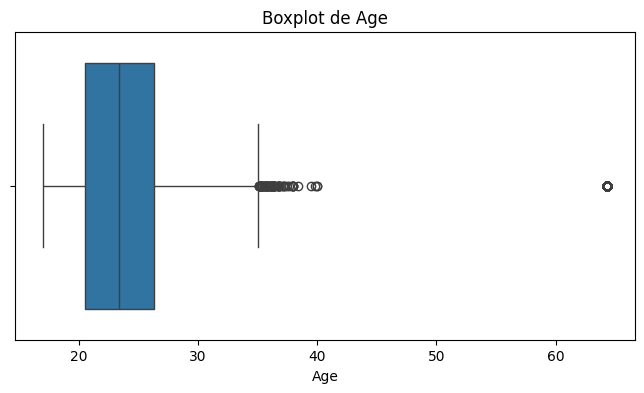

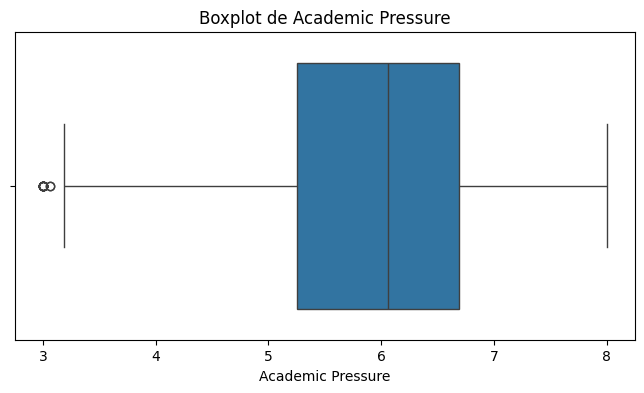

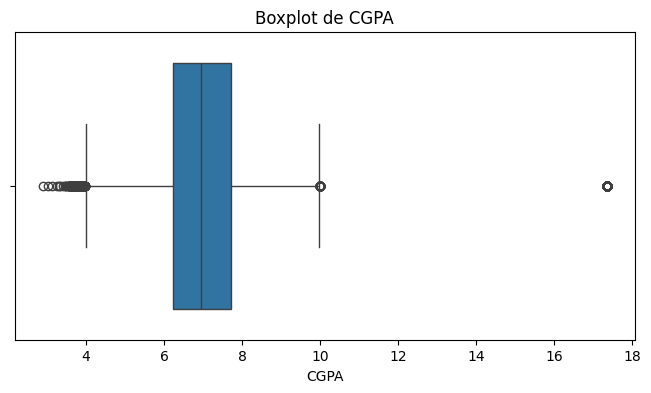

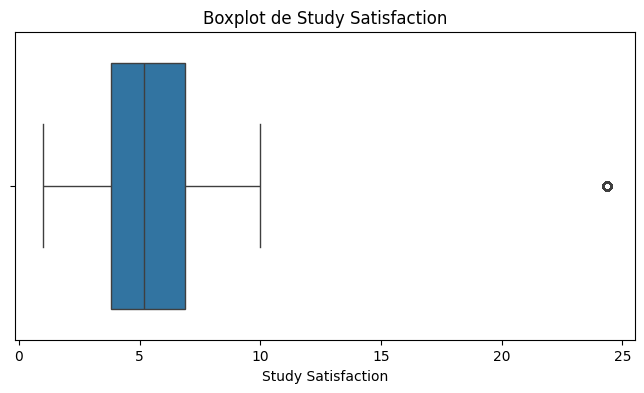

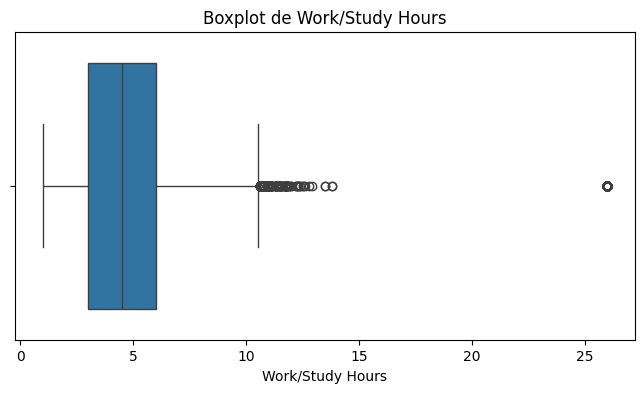

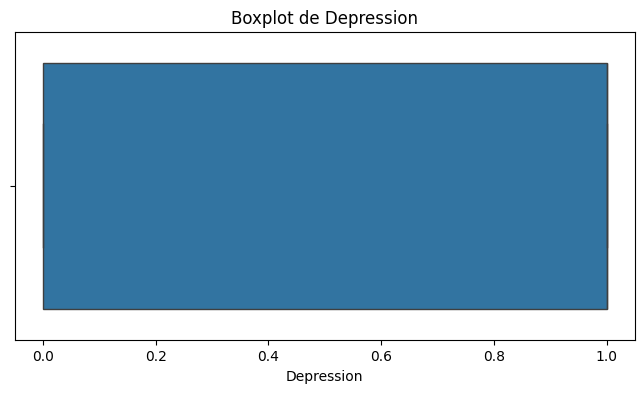

In [ ]:
#Afficher les boxplots pour identifier les valeurs aberrantes
numeric_cols = set.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=set[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

**Traitement de la colonne Age**

In [ ]:
# Affiche les statistiques descriptives de la colonne 'Age
set['Age'].describe()

count    32227.000000
mean        24.435465
std          7.560498
min         17.000000
25%         20.500000
50%         23.400000
75%         26.300000
max         64.290257
Name: Age, dtype: float64

In [ ]:
# Affiche toutes les valeurs uniques présentes dans la colonne 'Age'.
set['Age'].unique()

array([26.3       , 25.6       , 27.        , 32.9       , 28.8       ,
       18.1       , 26.8       , 25.3       , 26.9       , 21.5       ,
       23.3       , 27.1       , 17.        , 17.5       , 18.        ,
       28.1       , 20.2       , 26.7       , 18.3       , 27.9       ,
       25.7       , 28.        , 26.5       , 21.7       , 23.6       ,
       17.9       , 23.        , 28.5       , 27.3       , 22.1       ,
       22.8       , 22.2       , 26.        , 21.3       , 22.7       ,
       19.6       , 19.7       , 24.9       , 21.8       , 25.8       ,
       24.4       , 22.6       , 17.7       , 27.2       , 19.1       ,
       28.6       , 31.        , 21.6       , 25.        , 19.2       ,
       22.4       , 28.9       , 28.3       , 27.5       , 21.2       ,
       25.5       , 20.9       , 23.7       , 21.        , 25.4       ,
       19.5       , 20.8       , 25.2       , 24.2       , 24.8       ,
       18.2       , 24.6       , 33.4       , 20.7       , 20.1 

In [ ]:
# Affiche le nombre d'occurrences de chaque valeur dans la colonne 'Age'.
set['Age'].value_counts()

Age
17.000000    2220
23.400000    1316
64.290257     829
22.200000     318
23.900000     314
             ... 
36.000000       1
37.300000       1
39.800000       1
38.400000       1
37.200000       1
Name: count, Length: 211, dtype: int64

In [ ]:
# Arrondit les valeurs de la colonne 'Age' à l'entier le plus proche.
set['Age'] = set['Age'].round()

In [ ]:
# Supprime toutes les lignes où la valeur de 'Age' est égale à 64 (valeur aberrante).
set.drop(set[set['Age'] == 64].index, inplace=True)

In [ ]:
# Détection des valeurs aberrantes dans la colonne 'Age' à l'aide de l'IQR (Interquartile Range)
Q1 = set['Age'].quantile(0.25)
Q3 = set['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = set[(set['Age'] < lower) | (set['Age'] > upper)]
print("Valeurs aberrantes dans Age :")
print(outliers['Age'])

Valeurs aberrantes dans Age :
311      38.0
441      38.0
2417     36.0
2613     38.0
3315     38.0
         ... 
31702    37.0
32175    36.0
32222    36.0
32502    36.0
33121    36.0
Name: Age, Length: 62, dtype: float64


In [ ]:
#Limite inférieure et supérieur
set['Age'] = set['Age'].clip(lower, upper)

In [ ]:
# vérifier les valeurs de la colonne age
set['Age'].value_counts()

Age
23.0    3602
22.0    3015
24.0    2985
17.0    2639
26.0    2471
20.0    2300
25.0    2279
21.0    2185
27.0    1807
28.0    1717
18.0    1589
19.0    1531
29.0    1073
30.0     891
31.0     498
32.0     373
33.0     183
34.0     131
35.0     129
Name: count, dtype: int64

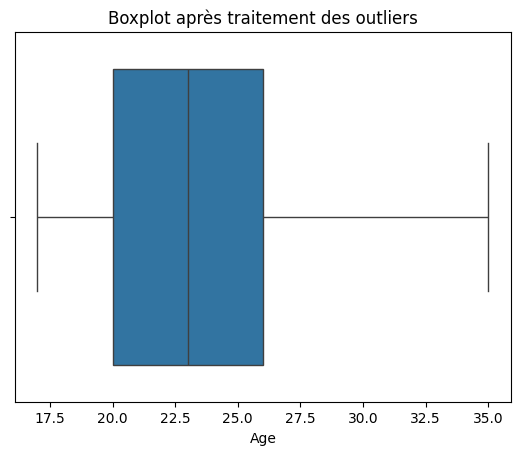

In [ ]:
# vérification de l'élimination des valeurs aberrantes dans la colonne age
set['Age'].describe()
sns.boxplot(x=set['Age'])
plt.title("Boxplot après traitement des outliers")
plt.show()


**Traitement de la colonne Academic Pressure**

In [ ]:
# Affiche le nombre d'occurrences de chaque valeur dans la colonne 'Academic Pressure'.
set['Academic Pressure'].value_counts()

Academic Pressure
6.0625    1648
8.0000     772
6.5000     771
6.2500     752
6.4375     752
          ... 
3.3125      13
3.3750      12
3.0000      12
3.1875       3
3.0625       2
Name: count, Length: 80, dtype: int64

In [ ]:
# Supprime toutes les lignes où la valeur de 'Academic Pressure' est inférieure à 4.
set = set.drop(set[set['Academic Pressure'] < 4].index)

In [ ]:
# Affiche les statistiques descriptives de la colonne 'Academic Pressure'.
set['Academic Pressure'].describe()

count    30881.000000
mean         6.013704
std          0.942936
min          4.000000
25%          5.250000
50%          6.062500
75%          6.687500
max          8.000000
Name: Academic Pressure, dtype: float64

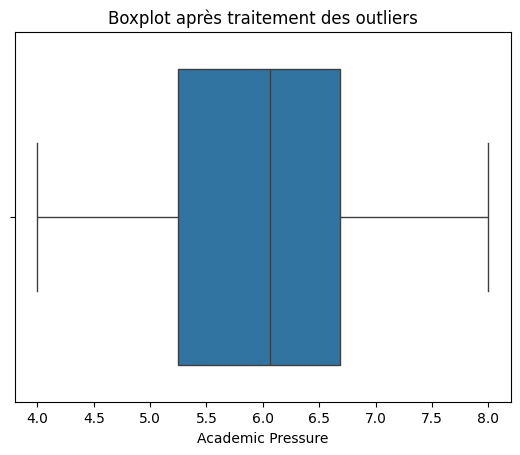

In [ ]:
# vérification d elimination de les valeurs aberrantes dans la colonne Academic Pressure
set['Academic Pressure'].describe()
sns.boxplot(x=set['Academic Pressure'])
plt.title("Boxplot après traitement des outliers")
plt.show()

**Traitement de la colonne Study Satisfaction**

In [ ]:
# Affiche le nombre d'occurrences de chaque valeur dans la colonne 'Study Satisfaction'.
set['Study Satisfaction'].value_counts()

Study Satisfaction
4.2    668
4.5    644
3.8    636
4.4    633
4.1    632
      ... 
1.2     35
9.7     30
9.6     27
9.8     25
9.9     14
Name: count, Length: 92, dtype: int64

In [ ]:
# Affiche le nombre de lignes où la valeur de 'Study Satisfaction' est supérieure à 20.
set[set['Study Satisfaction'] > 20].shape[0]

545

In [ ]:
# Remplacer les outliers > 10 par la médiane
median_val = set['Study Satisfaction'].median()
set.loc[(set['Study Satisfaction'] > 10), 'Study Satisfaction'] = median_val


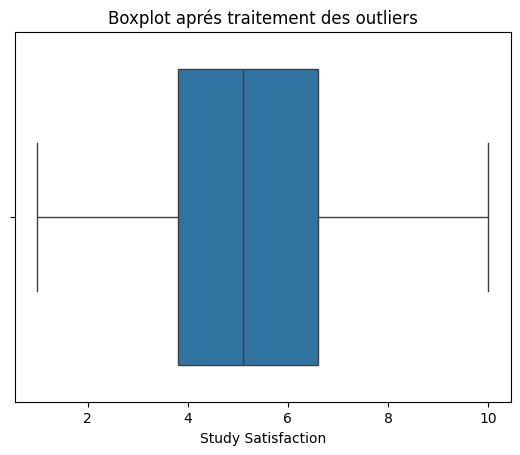

In [ ]:
set['Study Satisfaction'].describe()
sns.boxplot(x=set['Study Satisfaction'])
plt.title("Boxplot aprés traitement des outliers")
plt.show()


**Traitement de la colonne Work/study Hours**

In [ ]:
# Affiche le nombre d'occurrences de chaque valeur dans la colonne 'Work/Study Hours'.
set['Work/Study Hours'].value_counts()

Work/Study Hours
1.000000     2141
4.500000     1504
25.967775     566
4.100000      540
4.400000      533
             ... 
13.800000       2
12.800000       1
12.900000       1
12.600000       1
12.400000       1
Name: count, Length: 121, dtype: int64

In [ ]:
# Supprimer les valeurs qui sont supp à 24h
set = set[set['Work/Study Hours'] <= 24]


In [ ]:
Q111 = set['Work/Study Hours'].quantile(0.25)
Q333 = set['Work/Study Hours'].quantile(0.75)
IQR1 = Q333 - Q111
borne_inf1 = Q111 - 1.5 * IQR1
borne_sup1 = Q333 + 1.5 * IQR1

set = set[(set['Work/Study Hours'] >= borne_inf1) & (set['Work/Study Hours'] <= borne_sup1)]
set['Work/Study Hours'] = set['Work/Study Hours'].clip(upper=10)


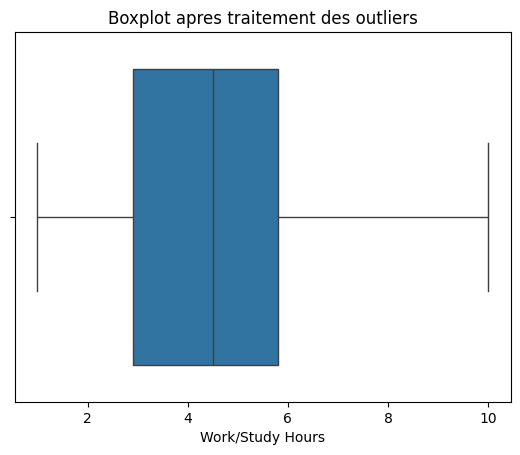

In [ ]:
set['Work/Study Hours'].describe()
sns.boxplot(x=set['Work/Study Hours'])
plt.title("Boxplot apres traitement des outliers")
plt.show()

**Traitement de la colonne CGPA**

In [ ]:
# Affiche toutes les valeurs uniques présentes dans la colonne 'CGPA'.
set['CGPA'].unique()

array([ 7.53      ,  8.08      ,  6.47      ,  8.02      ,  8.05      ,
        8.93      ,  7.78      ,  5.86      ,  7.98      ,  7.81      ,
        9.52      ,  7.07      ,  5.97      ,  8.12      ,  7.93      ,
        6.78      ,  5.54      ,  6.3       ,  4.65      ,  6.28      ,
        7.92      ,  5.68      ,  6.42      ,  6.79      ,  8.51      ,
        7.3       ,  5.52      ,  7.61      ,  5.78      ,  6.2       ,
        4.96      ,  6.5       ,  6.96      ,  5.93      ,  7.37      ,
        5.71      ,  6.32      ,  7.44      ,  7.6       ,  6.61      ,
        4.99      ,  6.4       ,  7.12      ,  6.51      ,  7.22      ,
        7.84      ,  6.76      ,  7.7       ,  9.23      ,  6.05      ,
        8.88      ,  8.73      ,  6.52      ,  6.66      ,  7.47      ,
        9.19      ,  6.11      ,  7.8       ,  7.25      ,  5.9       ,
        6.56      ,  7.67      ,  8.85      ,  7.31      ,  5.07      ,
        8.66      ,  5.69      ,  9.2       ,  9.45      ,  5.12

In [ ]:
# Calcul des bornes via la méthode IQR
Q1 = set['CGPA'].quantile(0.25)
Q3 = set['CGPA'].quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Clipping des outliers
CGPA_clipped = set['CGPA'].clip(lower=borne_inf, upper=borne_sup)

# Mise à l’échelle [0, 4] (système international)
set['CGPA'] = 4 * (CGPA_clipped - CGPA_clipped.min()) / (CGPA_clipped.max() - CGPA_clipped.min())


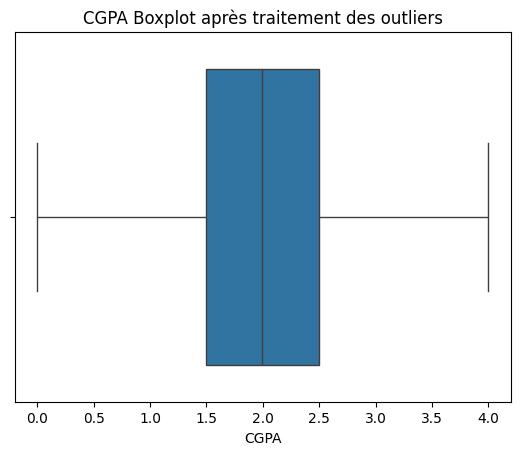

In [ ]:
# Vérification de l'élimination de les valeurs aberrantes dans la colonne 'CGPA'
set['CGPA'].describe()
sns.boxplot(x=set['CGPA'])
plt.title("CGPA Boxplot après traitement des outliers")
plt.show()


Vérifier que Tous les Valeurs abberantes sont éliminés

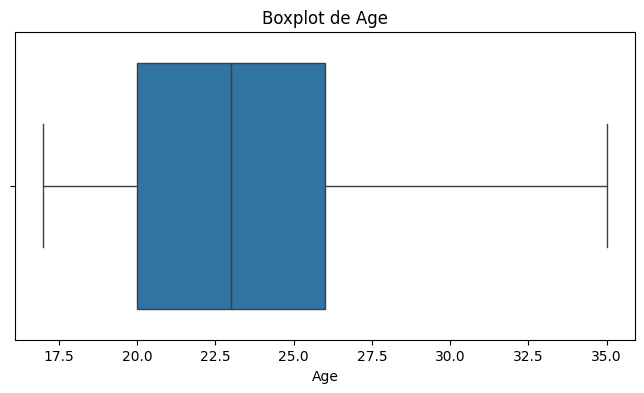

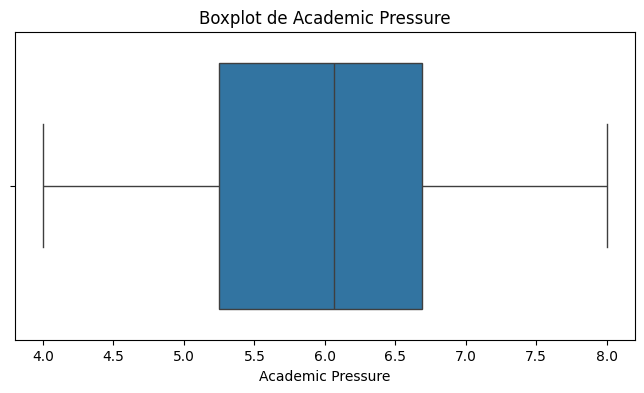

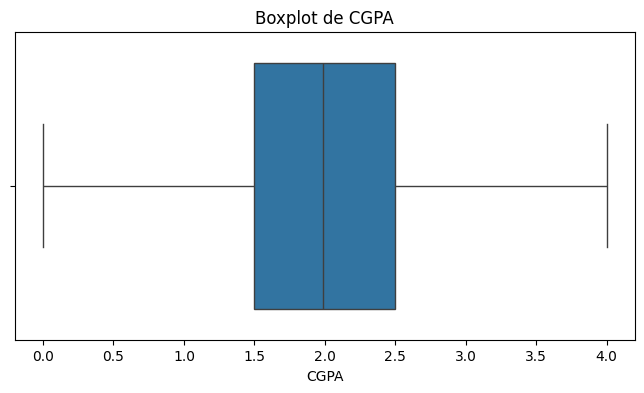

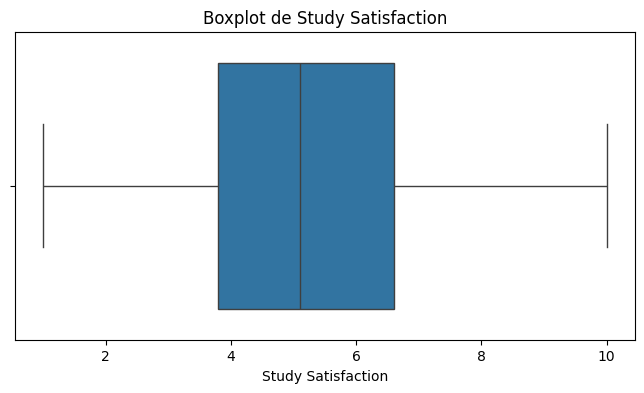

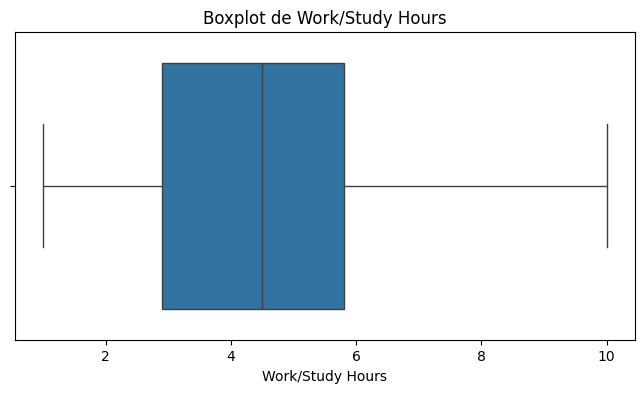

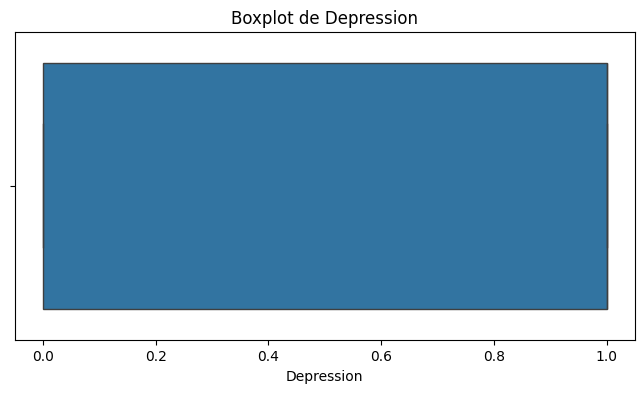

In [ ]:
# vérifier avec les boxplot que tous les valeurs abberantes sont éliminés
numeric_cols = set.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=set[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

✓ DONNÉES OPTIMISÉES :
  - Toutes les observations prennent désormais des valeurs logiques et acceptables

✓ QUALITÉ AMÉLIORÉE :
  - Les distributions sont maintenant plus représentatives
  - Réduction du bruit dans les données
  - Meilleure fiabilité pour l'entraînement des modèles

✓ IMPACT SUR LA MODÉLISATION :
  - Modèles plus robustes et généralisables
  - Réduction du risque de surapprentissage (overfitting)
  - Performances prédictives plus stables

# **Encodage des colonnes Qualitatives**

---



In [ ]:
# Afficher les colonnes non numériques et leurs valeurs uniques
non_numeric_cols = set.select_dtypes(exclude=['number']).columns

print(" Colonnes non numériques :\n")
for col in non_numeric_cols:
    print(f" {col}")
    print(set[col].unique())  # valeurs uniques
    print("-" * 60)


 Colonnes non numériques :

 Gender
['Female' 'Male']
------------------------------------------------------------
 Profession
['Student' 'Freelancer' 'Unemployed' 'Employee']
------------------------------------------------------------
 Sleep Duration
['5-6 hours' '7-8 hours' 'More than 8 hours' 'Less than 5 hours']
------------------------------------------------------------
 Dietary Habits
['Moderate' 'Healthy' 'Unhealthy']
------------------------------------------------------------
 Degree
['LLM' 'BBA' 'B.Ed' 'MD' 'ME' 'MA' 'B.Pharm' 'B.Com' 'PhD' 'MBBS' 'B.Tech'
 'B.Arch' 'M.Tech' 'BCA' 'BA' "'Class 12'" 'M.Ed' 'MCA' 'M.Com' 'BHM'
 'MSc' 'LLB' 'M.Pharm' 'BE' 'MBA' 'BSc' 'MHM' 'Others']
------------------------------------------------------------
 Have you ever had suicidal thoughts ?
['No' 'Yes']
------------------------------------------------------------
 Financial Stress
['Low' 'Medium' 'High']
------------------------------------------------------------
 Family History of Men

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copie du DataFrame d'origine
df_encoded = set.copy()

# Supprimer la colonne City
df_encoded.drop(columns=['City'], inplace=True, errors='ignore')

# Gender : Label Encoding (binaire)
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
# Description : attribue une valeur numérique à chaque genre.

# Profession : Label Encoding (nominale)
le_prof = LabelEncoder()
df_encoded['Profession'] = le_prof.fit_transform(df_encoded['Profession'].astype(str))
# Description : chaque profession reçoit un identifiant numérique unique.

# Sleep Duration : Ordinal Encoding
sleep_mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
df_encoded['Sleep Duration'] = df_encoded['Sleep Duration'].map(sleep_mapping)
# Description : encode la durée du sommeil selon un ordre logique (moins à plus).

# Dietary Habits : Ordinal Encoding
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
df_encoded['Dietary Habits'] = df_encoded['Dietary Habits'].map(diet_mapping)
# Description : encode les habitudes alimentaires selon la qualité de la diète.

# Degree : Label Encoding
le_degree = LabelEncoder()
df_encoded['Degree'] = le_degree.fit_transform(df_encoded['Degree'].astype(str))
# Description : chaque diplôme est remplacé par un entier unique.

# Have you ever had suicidal thoughts ? : Label Encoding
df_encoded['Have you ever had suicidal thoughts ?'] = df_encoded['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
# Description : binaire, 0 pour No et 1 pour Yes.

# Financial Stress : Ordinal Encoding
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['Financial Stress'] = df_encoded['Financial Stress'].map(stress_mapping)
# Description : encode le niveau de stress selon son intensité croissante.

# Family History of Mental Illness : Label Encoding
df_encoded['Family History of Mental Illness'] = df_encoded['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})
# Description : binaire, 0 pour No et 1 pour Yes.



print(df_encoded.head())


   Gender   Age  Profession  Academic Pressure      CGPA  Study Satisfaction  \
0       1  26.0           2             4.9375  2.392617                 9.5   
1       1  26.0           2             5.2500  2.761745                 8.1   
2       0  27.0           2             4.6250  1.681208                 6.3   
3       0  33.0           1             5.1250  2.721477                 9.4   
4       0  29.0           2             6.4375  2.741611                 7.4   

   Sleep Duration  Dietary Habits  Degree  \
0               2               2      13   
1               3               3       7   
2               4               3       3   
3               1               3      22   
4               3               3      23   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                      0               6.2                 1   
1                                      0               5.4                 1   
2       

# **S'assurer que la colonne cible est équilibrée**

In [ ]:
y = df_encoded['Depression']
print(y.value_counts())
print(y.value_counts(normalize=True))  # proportions


Depression
1.0    18146
0.0    12026
Name: count, dtype: int64
Depression
1.0    0.601419
0.0    0.398581
Name: proportion, dtype: float64


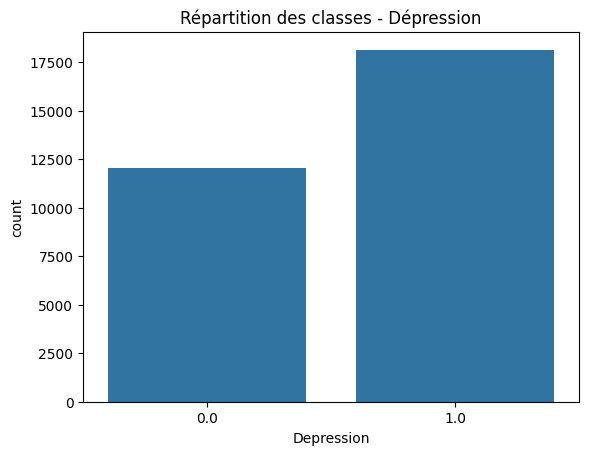

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Répartition des classes - Dépression")
plt.show()


Avant l’entraînement du modèle, nous avons analysé la distribution de la variable cible Depression.
Les résultats montrent que 60,1 % des étudiants sont étiquetés comme dépressifs, contre 39,9 % non dépressifs.
Cette légère asymétrie indique un déséquilibre modéré, mais pas suffisamment sévère pour nécessiter des techniques de rééchantillonnage.

# **Matrice de corrélation**

---



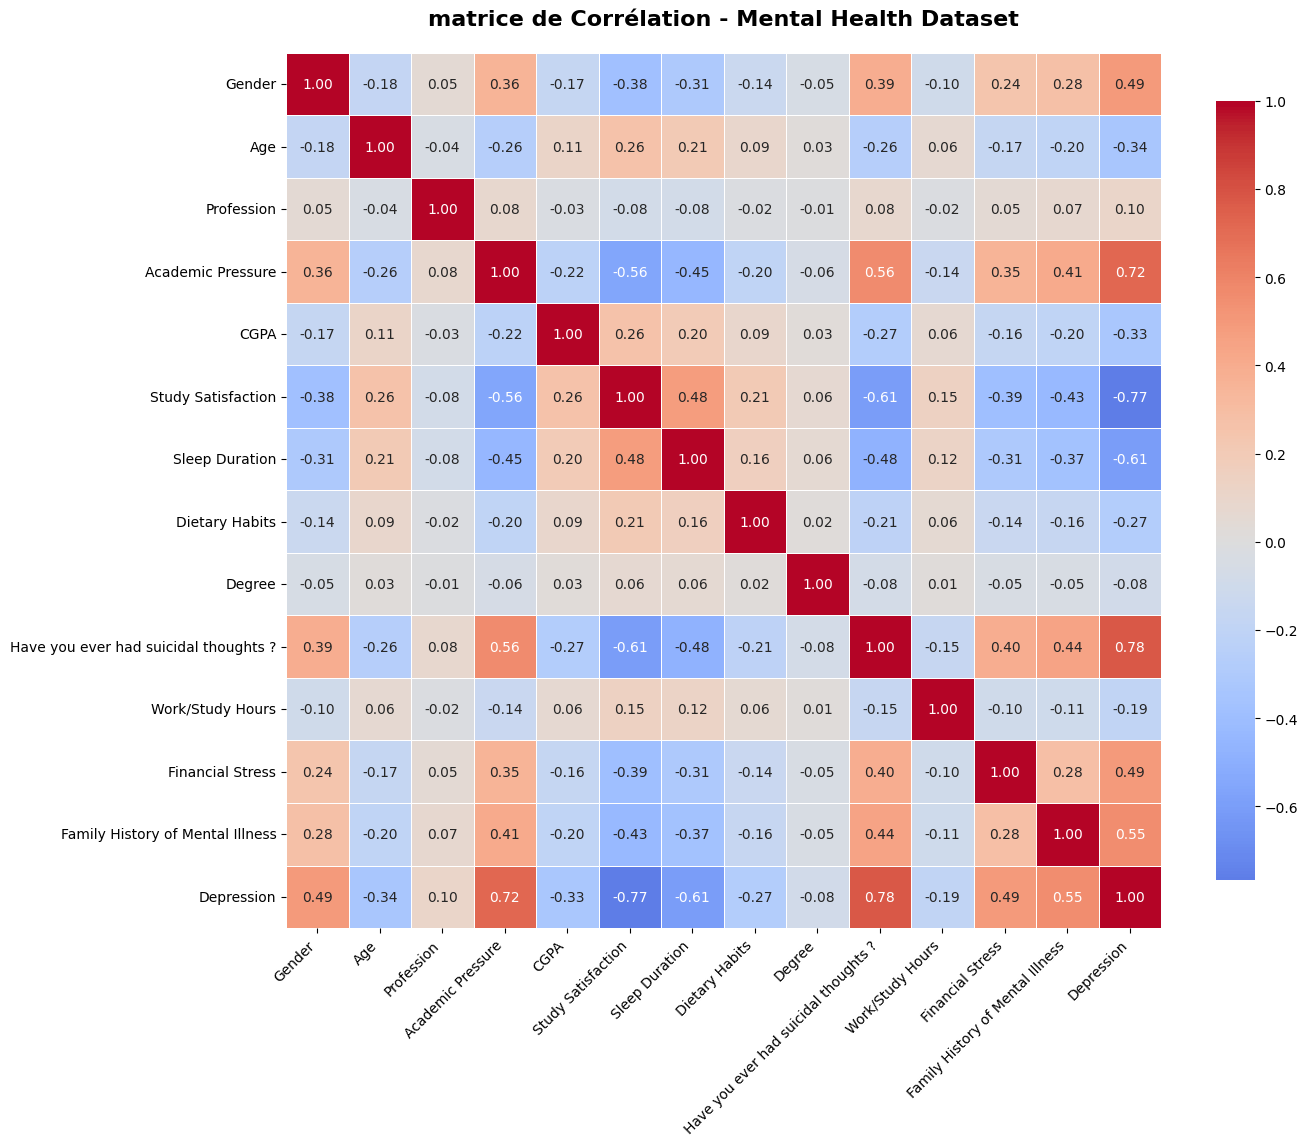

 CORRÉLATIONS AVEC LA VARIABLE CIBLE 'DEPRESSION'


Depression                               1.000000
Have you ever had suicidal thoughts ?    0.776280
Academic Pressure                        0.720858
Family History of Mental Illness         0.553912
Gender                                   0.494852
Financial Stress                         0.493376
Profession                               0.103098
Degree                                  -0.084849
Work/Study Hours                        -0.193469
Dietary Habits                          -0.270614
CGPA                                    -0.329211
Age                                     -0.337802
Sleep Duration                          -0.606474
Study Satisfaction                      -0.767031
Name: Depression, dtype: float64


 CORRÉLATIONS FORTES AVEC DEPRESSION (|r| > 0.3)


Have you ever had suicidal thoughts ?    0.776280
Academic Pressure                        0.720858
Family History of Mental Illness         0.553912
Gender      

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('matrice de Corrélation - Mental Health Dataset',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Afficher les corrélations avec Depression (variable cible)
print(" CORRÉLATIONS AVEC LA VARIABLE CIBLE 'DEPRESSION'")
print("\n")
depression_corr = correlation_matrix['Depression'].sort_values(ascending=False)
print(depression_corr)
print("\n")

# Identifier les corrélations fortes (|r| > 0.3)
print(" CORRÉLATIONS FORTES AVEC DEPRESSION (|r| > 0.3)")
print("\n")
strong_corr = depression_corr[abs(depression_corr) > 0.3]
strong_corr = strong_corr[strong_corr.index != 'Depression']
print(strong_corr)


In [ ]:
# Supprimer la colonne
df_encoded.drop(columns=['Have you ever had suicidal thoughts ?'], inplace=True, errors='ignore')


On va supprimer la colonne "Have you ever had suicidal thoughts ?" car non seulement elle est fortemement correlée avec la colonne cible, mais aussi elle présente un overfitting important au modèle

1. COLONNES DISPONIBLES dans le dataset :
    1. Gender - Type: int64
    2. Age - Type: float64
    3. Profession - Type: int64
    4. Academic Pressure - Type: float64
    5. CGPA - Type: float64
    6. Study Satisfaction - Type: float64
    7. Sleep Duration - Type: int64
    8. Dietary Habits - Type: int64
    9. Degree - Type: int64
   10. Work/Study Hours - Type: float64
   11. Financial Stress - Type: int64
   12. Family History of Mental Illness - Type: int64
   13. Depression - Type: float64

2. 12 FEATURES sélectionnées pour PCA :
    1. Gender
    2. Age
    3. Profession
    4. Academic Pressure
    5. CGPA
    6. Study Satisfaction
    7. Sleep Duration
    8. Dietary Habits
    9. Degree
   10. Work/Study Hours
   11. Financial Stress
   12. Family History of Mental Illness

4. DONNÉES pour PCA - Shape: (30172, 12)

5. STANDARDISATION terminée - Shape: (30172, 12)

6. PCA APPLIQUÉE - 12 composantes créées

7. VARIANCE EXPLIQUÉE par composante :
   PC  | Variance  | Cumulé

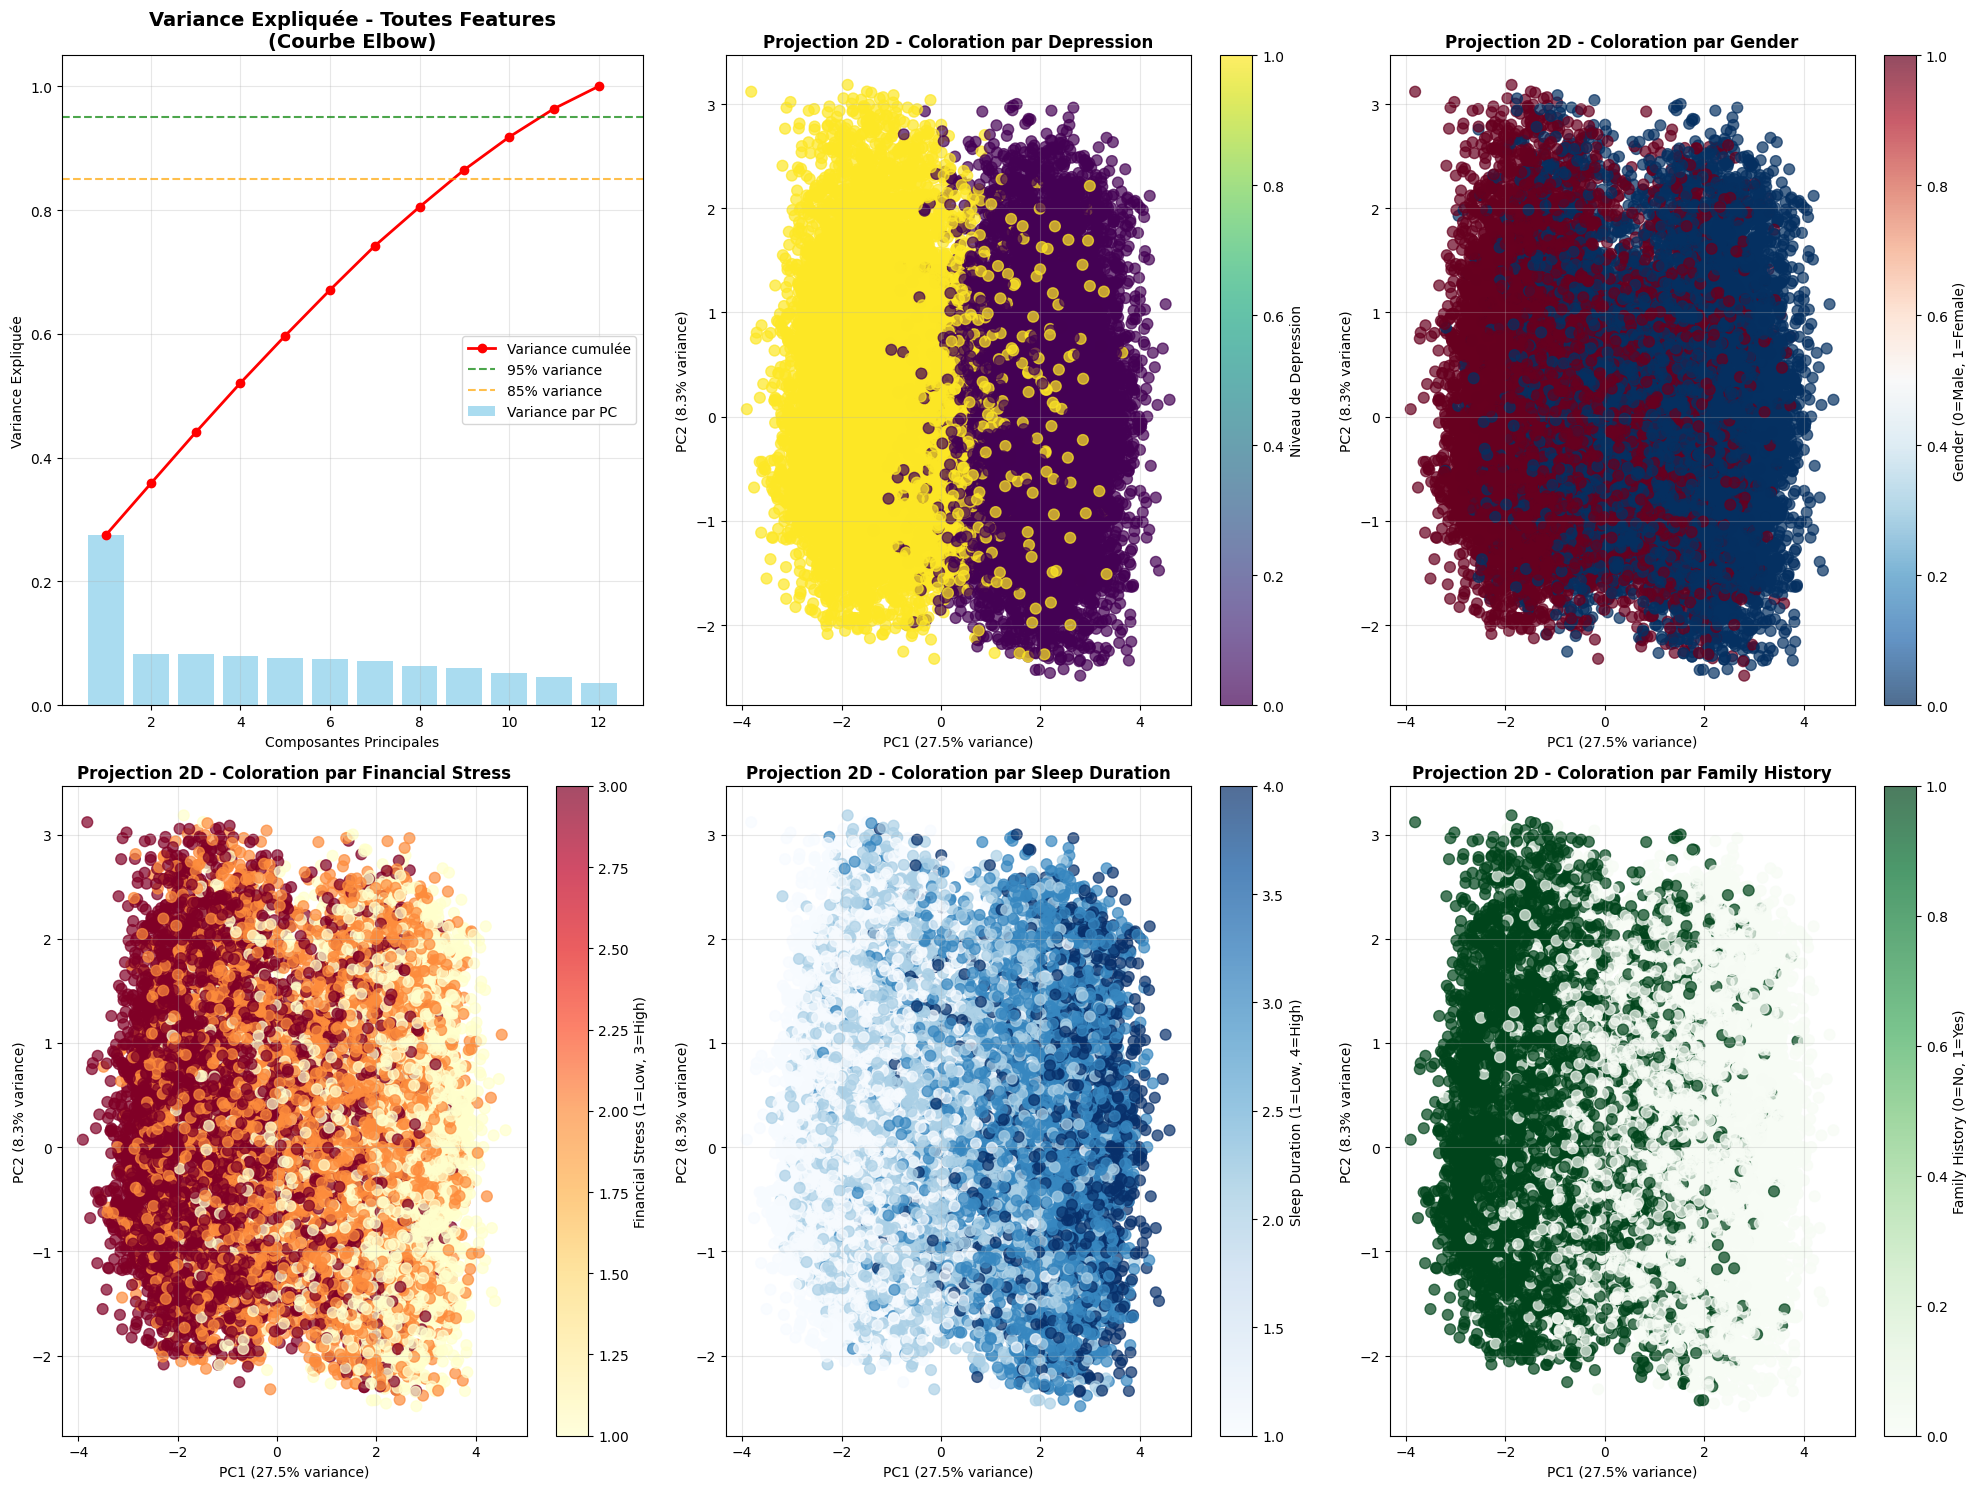


8. ANALYSE DES CONTRIBUTIONS DES VARIABLES :

TOP 10 CONTRIBUTIONS À PC1 :
   Study Satisfaction             : 0.7891
   Academic Pressure              : -0.7563
   Sleep Duration                 : 0.6878
   Family History of Mental Illness : -0.6467
   Financial Stress               : -0.5785
   Gender                         : -0.5770
   Age                            : 0.4241
   CGPA                           : 0.4038
   Dietary Habits                 : 0.3413
   Work/Study Hours               : 0.2438

TOP 10 CONTRIBUTIONS À PC2 :
   Degree                         : 0.7527
   Profession                     : -0.6082
   Dietary Habits                 : -0.1965
   Work/Study Hours               : -0.1234
   CGPA                           : -0.0583
   Academic Pressure              : 0.0217
   Study Satisfaction             : -0.0202
   Age                            : -0.0187
   Financial Stress               : 0.0156
   Sleep Duration                 : 0.0134


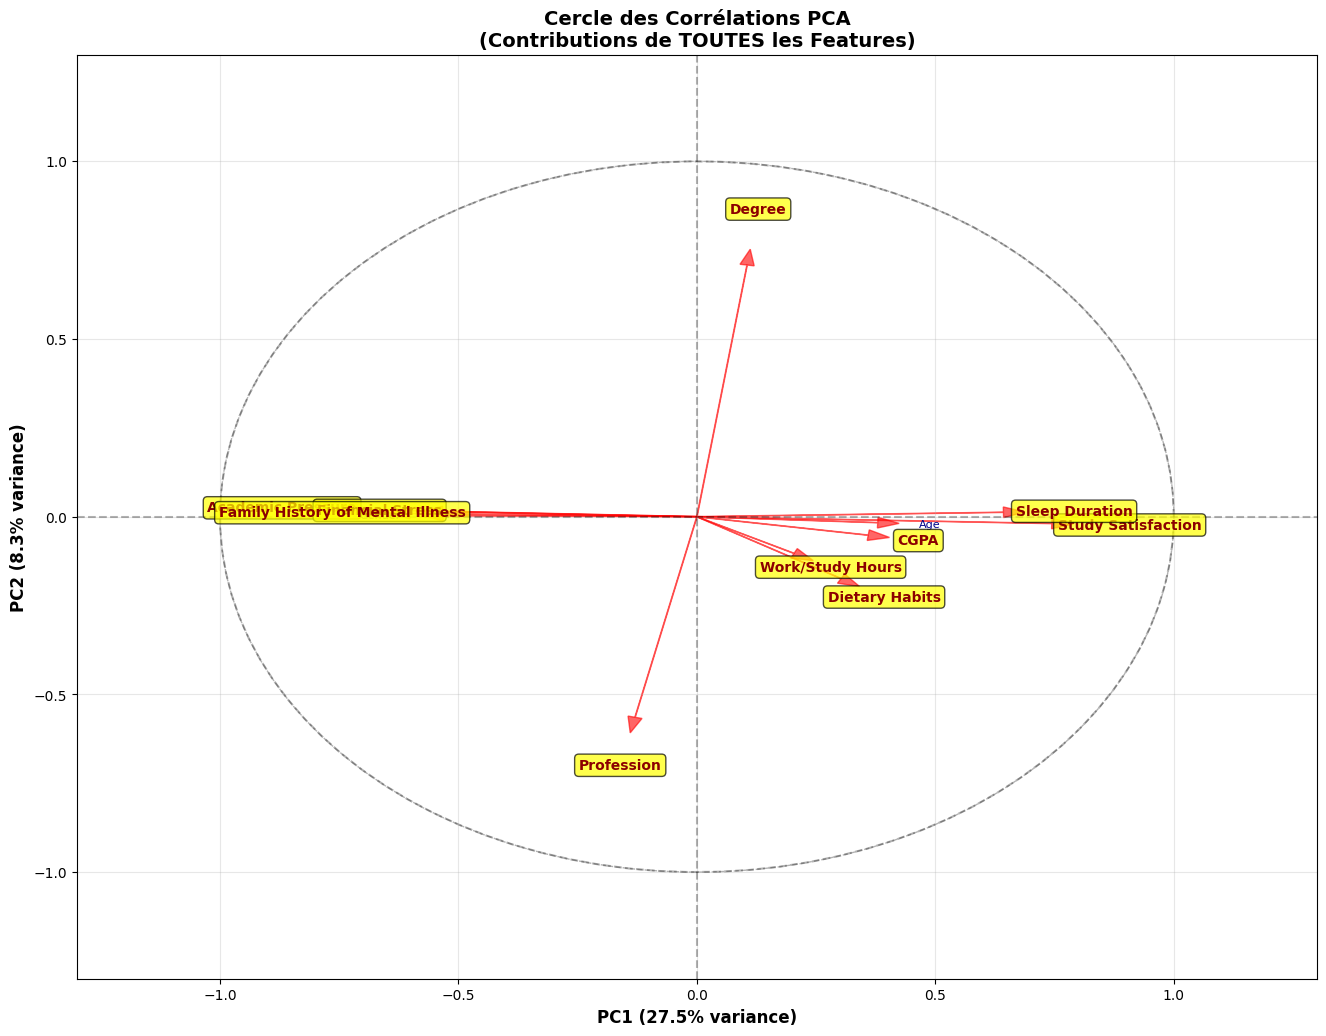


9. SYNTHÈSE ET RECOMMANDATIONS :
    TOTAL FEATURES ANALYSÉES : 12
    VARIANCE PC1 + PC2 : 35.8%
    COMPOSANTES pour 85% variance : 9
    COMPOSANTES pour 95% variance : 11

    TOP 5 VARIABLES les plus importantes :
      1. Study Satisfaction (impact: 0.789)
      2. Academic Pressure (impact: 0.756)
      3. Sleep Duration (impact: 0.688)
      4. Family History of Mental Illness (impact: 0.647)
      5. Financial Stress (impact: 0.579)

    INTERPRÉTATION DES RÉSULTATS :
      • PC1 explique 27.5% de la variance → Composante principale
      • Les 2 premières PC expliquent 35.8% de la variance
      • Study Satisfaction est la variable la plus influente

    LISTE COMPLÈTE des 12 features incluses :
      Gender, Age, Profession, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Degree, Work/Study Hours, Financial Stress, Family History of Mental Illness


In [ ]:
# Vérification de toutes les colonnes
print("1. COLONNES DISPONIBLES dans le dataset :")
all_columns = df_encoded.columns.tolist()
for i, col in enumerate(all_columns, 1):
    dtype = df_encoded[col].dtype
    print(f"   {i:2}. {col} - Type: {dtype}")

# Sélection de TOUTES les features (sauf la target 'Depression')
features_for_pca = [col for col in all_columns if col != 'Depression']

print(f"\n2. {len(features_for_pca)} FEATURES sélectionnées pour PCA :")
for i, feature in enumerate(features_for_pca, 1):
    print(f"   {i:2}. {feature}")

# Préparation des données pour PCA
X_pca_data = df_encoded[features_for_pca]

print(f"\n4. DONNÉES pour PCA - Shape: {X_pca_data.shape}")

# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_data)

print(f"\n5. STANDARDISATION terminée - Shape: {X_scaled.shape}")

# Application de la PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"\n6. PCA APPLIQUÉE - {X_pca.shape[1]} composantes créées")

# Analyse de la variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("\n7. VARIANCE EXPLIQUÉE par composante :")
print("   PC  | Variance  | Cumulée   | Signification")
print("   " + "-" * 50)
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    if i == 0:
        significance = "Très importante"
    elif i == 1:
        significance = "Importante"
    elif i < 5:
        significance = "Moyennement importante"
    else:
        significance = "Peu importante"
    print(f"   PC{i+1:2} | {var:8.4f}   | {cum_var:8.4f}  | {significance}")

# Visualisations
plt.figure(figsize=(20, 15))

# Courbe elbow
plt.subplot(2, 3, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance,
        alpha=0.7, color='skyblue', label='Variance par PC')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         'ro-', linewidth=2, label='Variance cumulée')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée - Toutes Features\n(Courbe Elbow)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95% variance')
plt.axhline(y=0.85, color='orange', linestyle='--', alpha=0.7, label='85% variance')
plt.legend()

# Projection 2D colorée par Depression
plt.subplot(2, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_encoded['Depression'], cmap='viridis', alpha=0.7, s=60)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Projection 2D - Coloration par Depression', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Niveau de Depression')
plt.grid(True, alpha=0.3)

# Projection 2D colorée par Gender (remplace suicidal thoughts)
plt.subplot(2, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_encoded['Gender'],
                     cmap='RdBu_r', alpha=0.7, s=60)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Projection 2D - Coloration par Gender', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Gender (0=Male, 1=Female)')
plt.grid(True, alpha=0.3)

# Projection 2D colorée par Financial Stress
plt.subplot(2, 3, 4)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_encoded['Financial Stress'],
                     cmap='YlOrRd', alpha=0.7, s=60)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Projection 2D - Coloration par Financial Stress', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Financial Stress (1=Low, 3=High)')
plt.grid(True, alpha=0.3)

# Projection 2D colorée par Sleep Duration
plt.subplot(2, 3, 5)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_encoded['Sleep Duration'],
                     cmap='Blues', alpha=0.7, s=60)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Projection 2D - Coloration par Sleep Duration', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Sleep Duration (1=Low, 4=High)')
plt.grid(True, alpha=0.3)

# Projection 2D colorée par Family History of Mental Illness
plt.subplot(2, 3, 6)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df_encoded['Family History of Mental Illness'],
                     cmap='Greens', alpha=0.7, s=60)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)')
plt.title('Projection 2D - Coloration par Family History', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Family History (0=No, 1=Yes)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse DÉTAILLÉE des contributions
print("\n8. ANALYSE DES CONTRIBUTIONS DES VARIABLES :")

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# CONTRIBUTIONS à PC1 et PC2
pc1_loadings = loadings[:, 0]    # contributions à PC1
pc2_loadings = loadings[:, 1]    # contributions à PC2

# Associer chaque feature à sa loading
pc1_contrib = sorted(
    list(zip(features_for_pca, pc1_loadings)),
    key=lambda x: abs(x[1]),
    reverse=True
)

pc2_contrib = sorted(
    list(zip(features_for_pca, pc2_loadings)),
    key=lambda x: abs(x[1]),
    reverse=True
)

print("\nTOP 10 CONTRIBUTIONS À PC1 :")
for feature, value in pc1_contrib[:10]:
    print(f"   {feature:30} : {value:.4f}")

print("\nTOP 10 CONTRIBUTIONS À PC2 :")
for feature, value in pc2_contrib[:10]:
    print(f"   {feature:30} : {value:.4f}")



# Cercle des corrélations
plt.figure(figsize=(16, 12))

# Cercle unité
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)

# Flèches pour toutes les variables
for i, feature in enumerate(features_for_pca):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='red', alpha=0.6, head_width=0.03, length_includes_head=True)

    # Mise en évidence des top contributeurs
    is_top_contributor = feature in [x[0] for x in pc1_contrib[:5]] or feature in [x[0] for x in pc2_contrib[:5]]

    if is_top_contributor:
        plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature,
                 color='darkred', fontsize=10, ha='center', va='center',
                 fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    else:
        plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature,
                 color='darkblue', fontsize=8, ha='center', va='center')



plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.xlabel(f'PC1 ({explained_variance[0]:.1%} variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({explained_variance[1]:.1%} variance)', fontsize=12, fontweight='bold')

plt.title('Cercle des Corrélations PCA\n(Contributions de TOUTES les Features)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Cercle unité
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.3)
plt.show()

# SYNTHÈSE FINALE
print("\n9. SYNTHÈSE ET RECOMMANDATIONS :")
print(f"    TOTAL FEATURES ANALYSÉES : {len(features_for_pca)}")
print(f"    VARIANCE PC1 + PC2 : {cumulative_variance[1]:.1%}")
print(f"    COMPOSANTES pour 85% variance : {(cumulative_variance >= 0.85).argmax() + 1}")
print(f"    COMPOSANTES pour 95% variance : {(cumulative_variance >= 0.95).argmax() + 1}")

print(f"\n    TOP 5 VARIABLES les plus importantes :")
for i, (var, contrib) in enumerate(pc1_contrib[:5], 1):
    print(f"      {i}. {var} (impact: {abs(contrib):.3f})")

print(f"\n    INTERPRÉTATION DES RÉSULTATS :")
print(f"      • PC1 explique {explained_variance[0]:.1%} de la variance → Composante principale")
print(f"      • Les 2 premières PC expliquent {cumulative_variance[1]:.1%} de la variance")
print(f"      • {pc1_contrib[0][0]} est la variable la plus influente")

print(f"\n    LISTE COMPLÈTE des {len(features_for_pca)} features incluses :")
print("      " + ", ".join(features_for_pca))


Le PCA analyse 12 variables liées à la vie étudiante pour comprendre :

* Les structures cachées dans les données

* Quelles variables influencent le plus

* Comment les étudiants se regroupent selon leurs caractéristiques.

C’est très utile dans un projet de santé mentale pour comprendre les facteurs dominants.


---



**PCA colorée par Financial Stress**
* À gauche : niveaux plus élevés de stress financier
* À droite : faible stress

➡ Financial Stress suit exactement PC1, comme prévu.

**PCA colorée par Sleep Duration**
* À droite : étudiants qui dorment plus
* À gauche : étudiants qui dorment peu

➡ Cela confirme que Sleep Duration est un facteur majeur du bien-être.

**PCA colorée par Gender**
* Légère asymétrie : les femmes semblent plus à gauche (si codage 1 = femme)

➡ Indice que le genre influence certains facteurs psychologiques du dataset.

---



**Cercle des corrélations**
Les flèches montrent :

* Study Satisfaction et Sleep Duration pointent dans la même direction
(corrélées positivement)

* Academic Pressure, Financial Stress, Family History pointent dans la direction inverse
(corrélées négativement au mieux-être)

* Degree est orthogonal → influence différente, indépendante

In [ ]:
# Déterminer le nombre optimal de composantes
optimal_components_85 = (cumulative_variance >= 0.85).argmax() + 1
optimal_components_95 = (cumulative_variance >= 0.95).argmax() + 1

print(f" RECOMMANDATIONS POUR LA SUITE :")
print(f"   • Pour 85% de variance : {optimal_components_85} composantes")
print(f"   • Pour 95% de variance : {optimal_components_95} composantes")
print(f"   • Ratio optimal qualité/performance : {optimal_components_85} composantes")

 RECOMMANDATIONS POUR LA SUITE :
   • Pour 85% de variance : 9 composantes
   • Pour 95% de variance : 11 composantes
   • Ratio optimal qualité/performance : 9 composantes


# **4. Modeling**

**Split des données pour l’entraînement et le test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Variables explicatives
X = df_encoded.drop(columns=['Depression'])
# Variable cible
y = df_encoded['Depression']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y , random_state=42, shuffle=True)


Les données ont été divisées en un ensemble d’entraînement (70 %) et un ensemble de test (30 %) à l’aide de la fonction train_test_split.
La séparation a été stratifiée selon la variable cible Depression, de manière à conserver le même ratio d’étudiants dépressifs et non dépressifs dans les deux sous-ensembles.
Cette étape garantit une évaluation fiable du modèle et évite les biais dus au déséquilibre modéré du dataset.

**Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler

#   STANDARDISATION
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Toutes les variables explicatives ont été standardisées à l’aide du StandardScaler afin de leur donner la même importance lors de l’entraînement du modèle.
Cette étape est indispensable pour les algorithmes sensibles à l’échelle des données (SVM, régression logistique, KNN...).
Le scaler a été ajusté uniquement sur l’ensemble d'entraînement pour éviter toute fuite de données, puis appliqué à l’ensemble de test.

**PCA**

In [ ]:
pca = PCA(n_components=9)  # 9 composantes pour 86% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f" Données préparées :")
print(f"   X_train_pca : {X_train_pca.shape}, y_train : {y_train.shape}")
print(f"   X_test_pca  : {X_test_pca.shape}, y_test  : {y_test.shape}")

 Données préparées :
   X_train_pca : (21120, 9), y_train : (21120,)
   X_test_pca  : (9052, 9), y_test  : (9052,)


L’analyse en composantes principales (PCA) a été appliquée aux données standardisées.
Sur la base des résultats précédents, nous avons retenu 9 composantes principales, expliquant environ 86 % de la variance totale.

---



# **Objectif 1 : Détection des étudiants à risque de dépression**

**Classification par SVM**

In [ ]:
from sklearn.svm import SVC

# Création et entraînement du modèle SVM
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced')  # kernel RBF = non linéaire
svm_model.fit(X_train_pca, y_train)

# Prédictions
y_pred_svm = svm_model.predict(X_test_pca)

# Évaluation
print("Résultats SVM :")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_svm))


Résultats SVM :
Accuracy : 0.9692885550154662

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      3608
         1.0       0.98      0.97      0.97      5444

    accuracy                           0.97      9052
   macro avg       0.97      0.97      0.97      9052
weighted avg       0.97      0.97      0.97      9052



Ces résultats confirment que le modèle SVM, associé à la réduction dimensionnelle par PCA, est capable de prédire efficacement le risque de dépression, en équilibrant correctement la détection des deux classes malgré un léger déséquilibre dans le dataset.

---





**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)

print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest: 0.9699513919575784
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      3608
         1.0       0.97      0.98      0.98      5444

    accuracy                           0.97      9052
   macro avg       0.97      0.97      0.97      9052
weighted avg       0.97      0.97      0.97      9052



Le modèle Random Forest a montré d’excellentes performances pour la prédiction du risque de dépression.
Le modèle présente un équilibre confirmant sa capacité à généraliser et à capturer les relations complexes entre les facteurs psychologiques, académiques et environnementaux des étudiants.

---



**XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("Accuracy XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy XGBoost: 0.9771321254971277
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3608
         1.0       0.98      0.98      0.98      5444

    accuracy                           0.98      9052
   macro avg       0.98      0.98      0.98      9052
weighted avg       0.98      0.98      0.98      9052



Ce modèle montre une excellente capacité à capturer les relations complexes entre les facteurs académiques, psychologiques et comportementaux, ce qui en fait un candidat très solide pour la prédiction du risque de dépression.

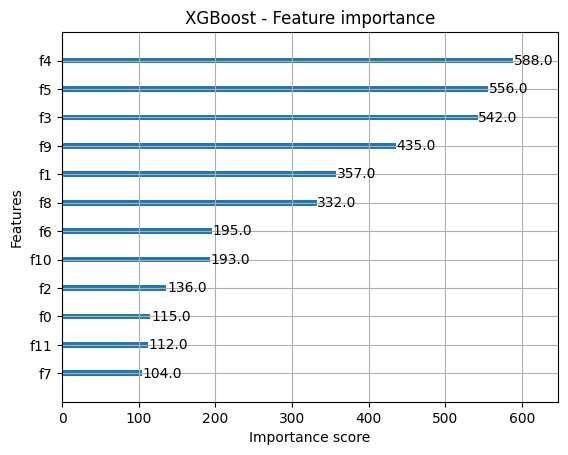

In [ ]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features=15)
plt.title("XGBoost - Feature importance")
plt.show()


L’analyse des importances de caractéristiques du modèle XGBoost montre que les facteurs académiques sont les plus déterminants dans la prédiction du risque de dépression.

---



**Classification par KNN**

In [ ]:
# Importation des librairies
from sklearn.neighbors import KNeighborsClassifier

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)

# Prédiction
y_pred_knn = knn_model.predict(X_test_pca)

# Évaluation
print("Évaluation du modèle KNN :\n")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_knn))

Évaluation du modèle KNN :

Accuracy : 0.9635439681838268

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      3608
         1.0       0.97      0.97      0.97      5444

    accuracy                           0.96      9052
   macro avg       0.96      0.96      0.96      9052
weighted avg       0.96      0.96      0.96      9052



Le modèle KNN classe chaque étudiant en fonction des profils qui lui ressemblent le plus dans le dataset (en termes de satisfaction d’étude, sommeil, pression académique, stress, etc.).

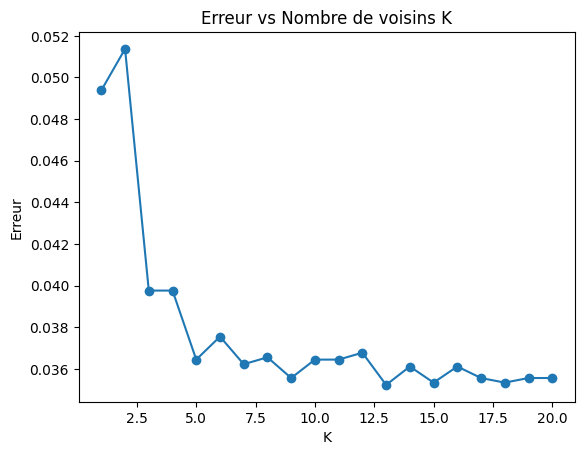

In [ ]:
errors = []
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_pca, y_train)
    pred = knn_temp.predict(X_test_pca)
    errors.append(1 - accuracy_score(y_test, pred))

plt.plot(range(1, 21), errors, marker='o')
plt.title("Erreur vs Nombre de voisins K")
plt.xlabel("K")
plt.ylabel("Erreur")
plt.show()


Nous avons testé différentes valeurs de K (de 1 à 20) et analysé l’évolution de l’erreur sur le jeu de test.
Cette analyse permet d’identifier un compromis entre sur-apprentissage (K trop faible) et sous-apprentissage (K trop élevé), afin de sélectionner un modèle KNN qui généralise correctement la relation entre le profil des étudiants et leur risque de dépression.

---



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=200)
log_model.fit(X_train_pca, y_train)
y_pred_log = log_model.predict(X_test_pca)

print("Évaluation du modèle Logistic Regression :\n")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("\nRapport de classification :\n",classification_report(y_test, y_pred_log))


Évaluation du modèle Logistic Regression :

Accuracy : 0.9681838267786125

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      3608
         1.0       0.98      0.97      0.97      5444

    accuracy                           0.97      9052
   macro avg       0.97      0.97      0.97      9052
weighted avg       0.97      0.97      0.97      9052



Le modèle fournit une estimation probabiliste du risque de dépression en fonction des composantes principales.
Cette approche linéaire offre un modèle simple, interprétable, et utile comme référence de base pour évaluer les performances des autres algorithmes plus complexes.

---



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

print("Évaluation du modèle Decision Tree :\n")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("\nRapport de classification :\n",classification_report(y_test, y_pred_tree))


Évaluation du modèle Decision Tree :

Accuracy : 0.9605612019443217

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      3608
         1.0       0.96      0.97      0.97      5444

    accuracy                           0.96      9052
   macro avg       0.96      0.96      0.96      9052
weighted avg       0.96      0.96      0.96      9052



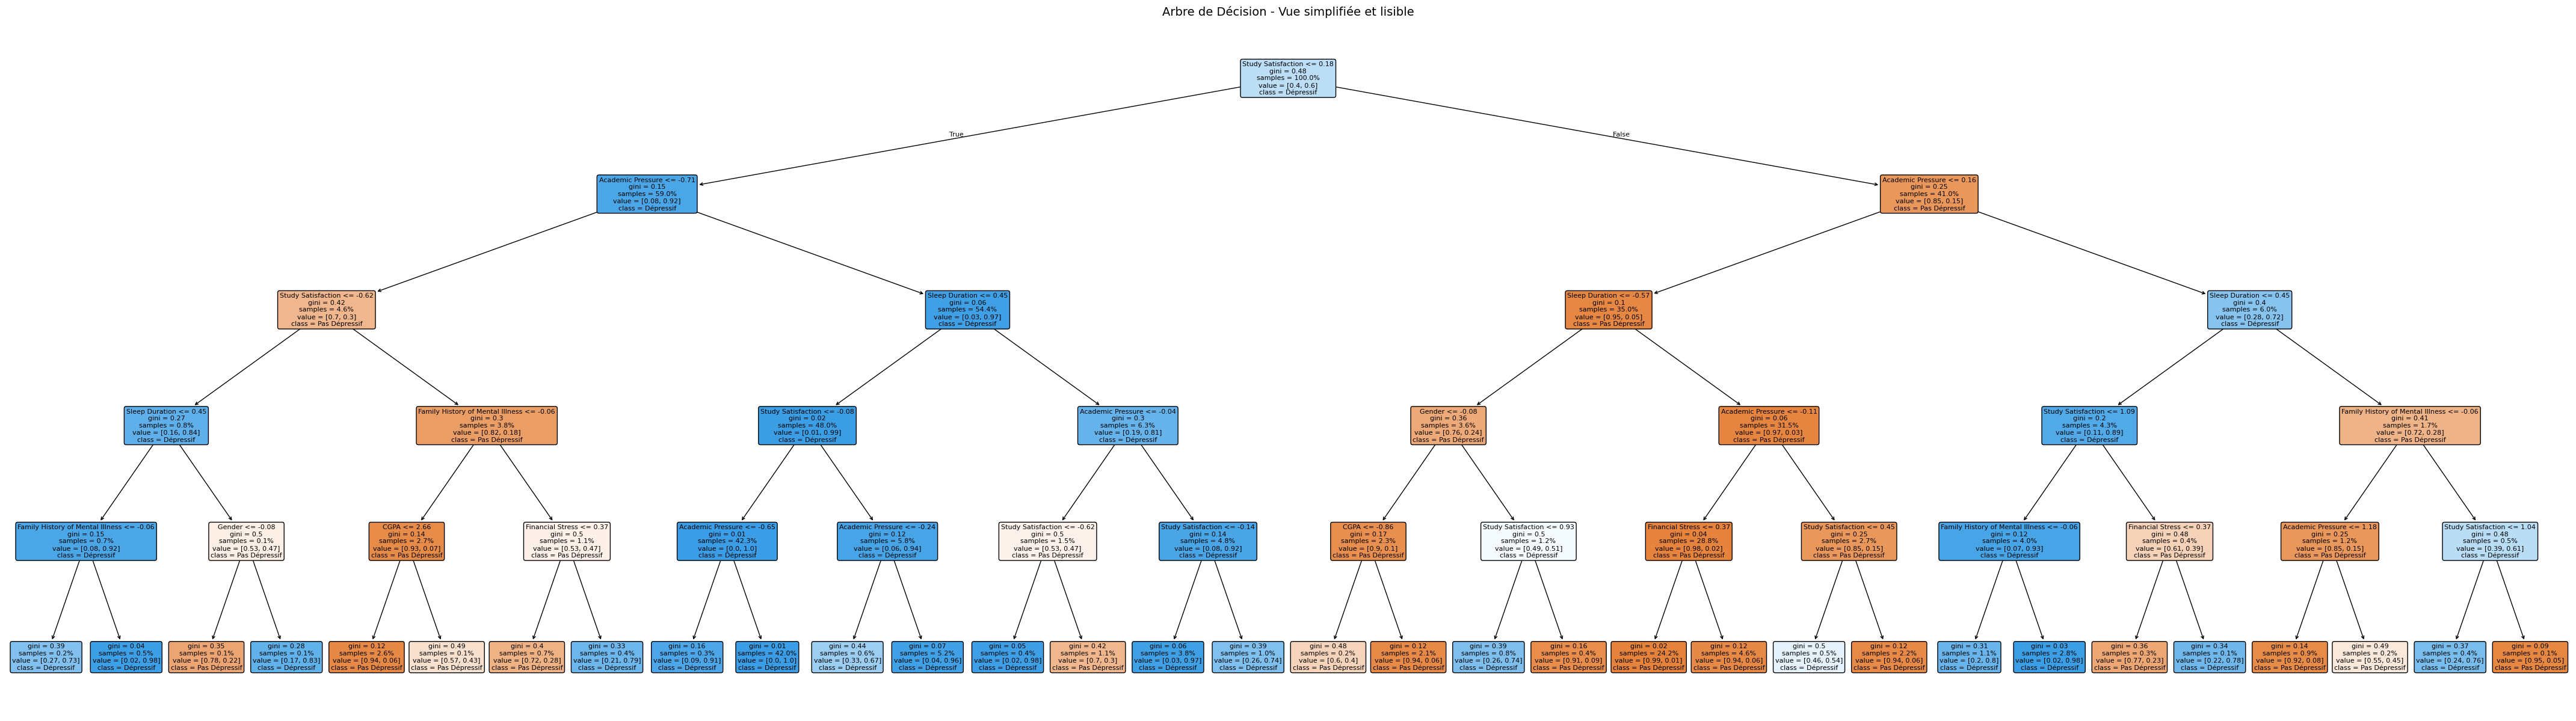

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt

plt.figure(figsize=(55,15))  # Taille raisonnable
sktree.plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['Pas Dépressif', 'Dépressif'],
    filled=True,           # Couleurs selon la classe prédite
    rounded=True,          # Coins arrondis pour la lisibilité
    proportion=True,       # Affiche la proportion au lieu du nombre brut
    precision=2,           # Arrondit les valeurs
    fontsize=8,           # Taille du texte adaptée
    max_depth=5            # Affiche uniquement les 3 premiers niveaux
)
plt.title("Arbre de Décision - Vue simplifiée et lisible", fontsize=14)
plt.show()


Ce graphique permet de lire les règles de décision apprises par le modèle

par exemple, on peut voir des chemins du type :

Pression académique forte + faible satisfaction d’étude + faible sommeil → classe “Dépressif”.

C’est une excellente manière d’illustrer, de façon interprétable, les facteurs de risque de dépression dans ton dataset.

---



**Evaluation**

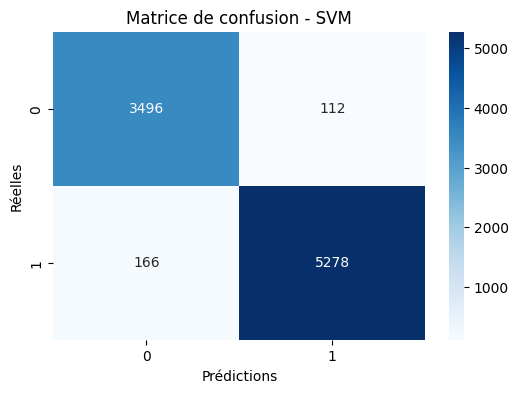

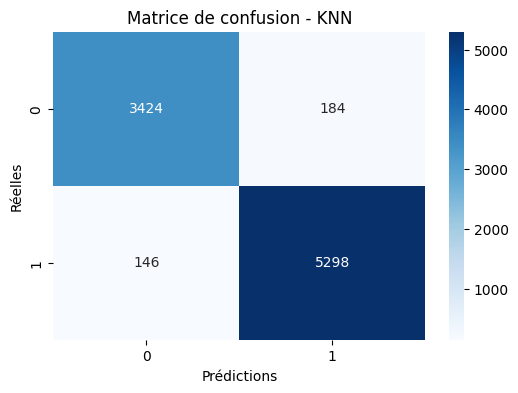

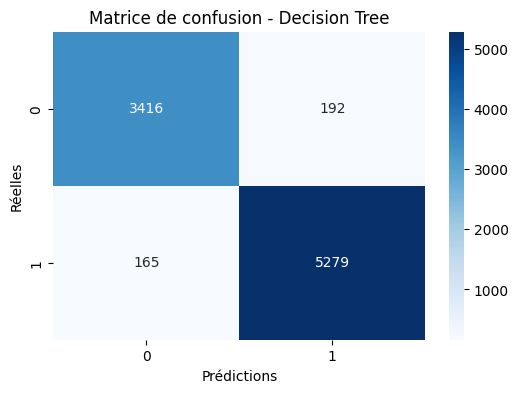

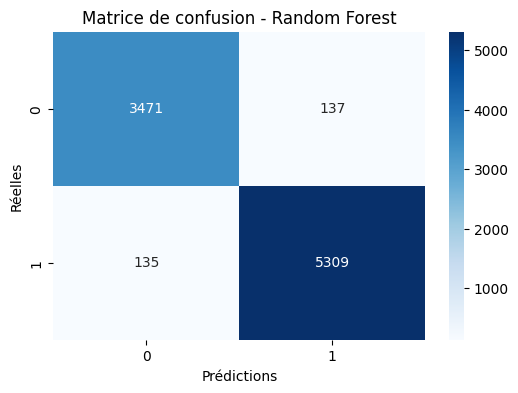

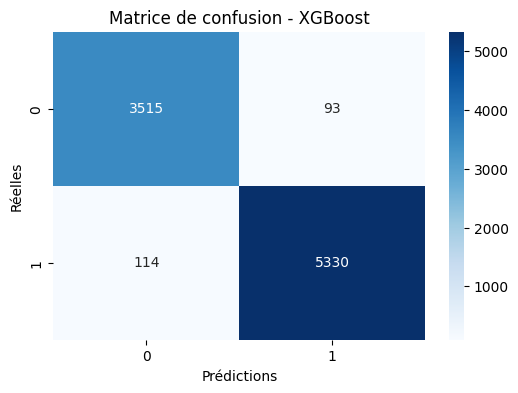

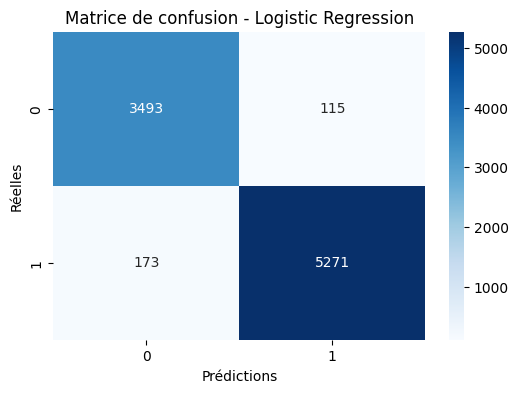

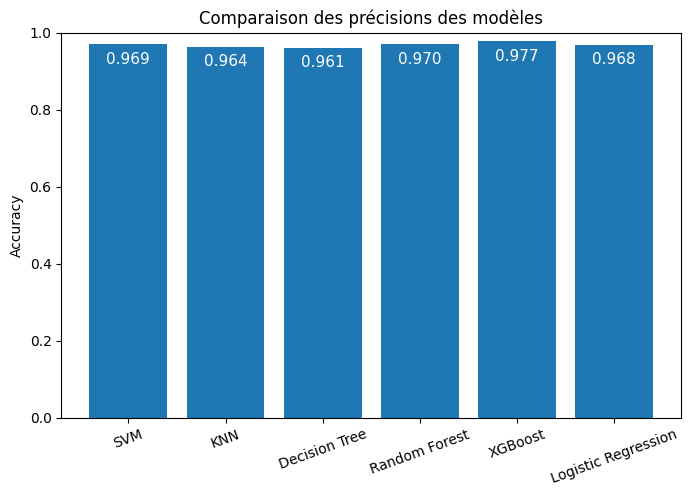

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


# Dictionnaire des modèles et prédictions


model_predictions = {
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Logistic Regression": y_pred_log
}


# Matrices de confusion pour chaque modèle


for model_name, y_pred in model_predictions.items():

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Réelles")
    plt.show()


# Comparaison des accuracies


model_names = list(model_predictions.keys())
accuracies = [accuracy_score(y_test, model_predictions[m]) for m in model_names]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies)
plt.ylim(0, 1)
plt.title("Comparaison des précisions des modèles")
plt.ylabel("Accuracy")

# Affichage des valeurs
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() - 0.05,
             f"{bar.get_height():.3f}",
             ha='center', color='white', fontsize=11)

plt.xticks(rotation=20)
plt.show()


XGBoost se démarque comme le meilleur modèle, avec l’accuracy la plus élevée et le plus faible nombre d’erreurs dans la matrice de confusion.
Random Forest arrive juste derrière, offrant une excellente robustesse.
SVM et Regression Logistique fournissent aussi de très bons résultats, mais commettent davantage de faux négatifs.
KNN et Decision Tree sont corrects mais moins performants, car ils gèrent moins bien les relations complexes présentes dans le dataset.

---



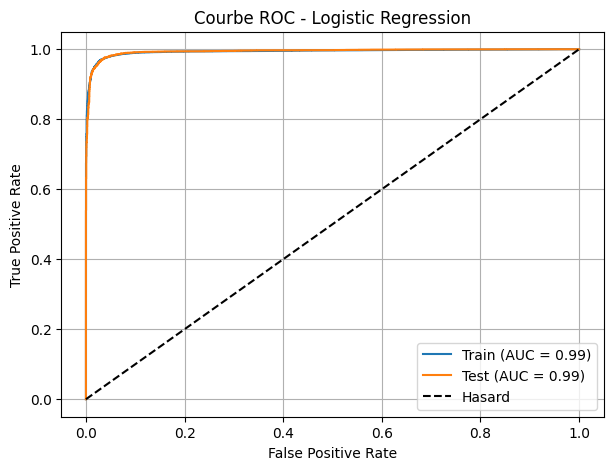

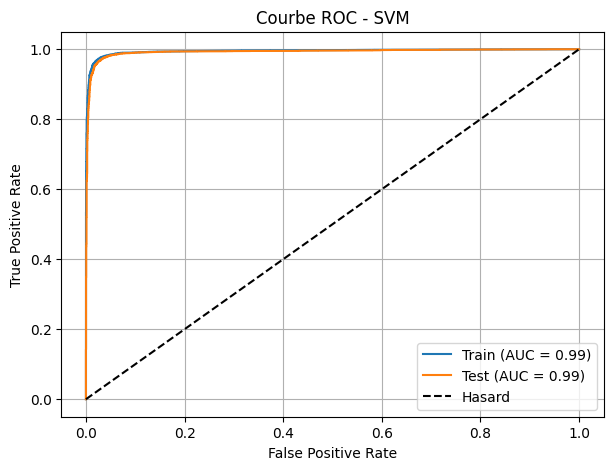

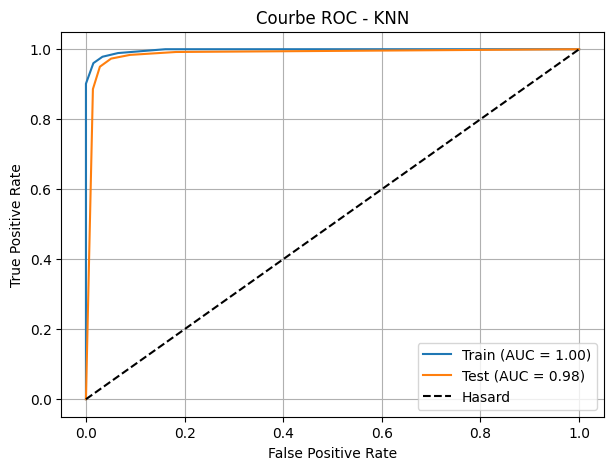

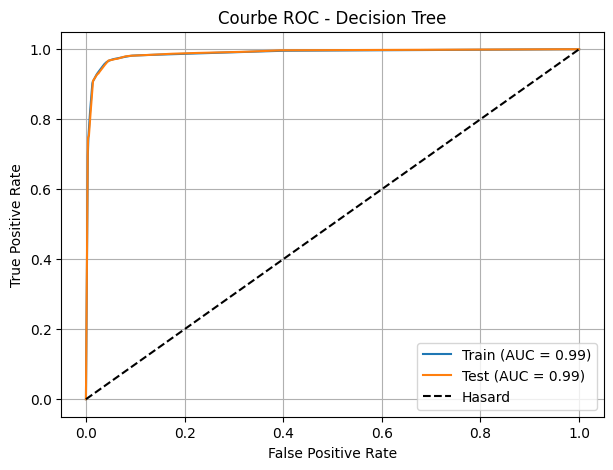

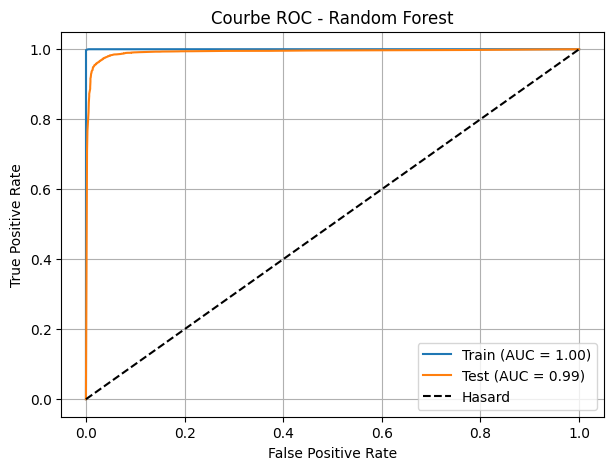

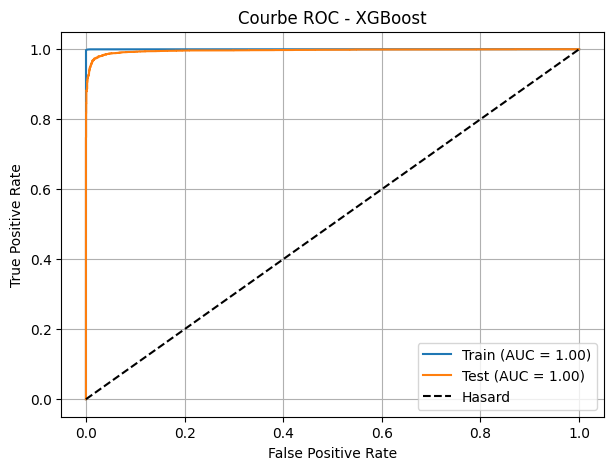

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    # Sélection des bons X pour train et test
    if name in ["Logistic Regression", "SVM", "KNN", "Random Forest"]:
        X_train_used = X_train_pca     # modèles entraînés sur PCA
        X_test_used  = X_test_pca
    else:
        X_train_used = X_train_scaled  # modèles entraînés sur données normalisées
        X_test_used  = X_test_scaled

    # SCORES TRAIN
    if hasattr(model, "predict_proba"):
        y_score_train = model.predict_proba(X_train_used)[:, 1]
    else:
        y_score_train = model.decision_function(X_train_used)

    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    auc_train = auc(fpr_train, tpr_train)

    # SCORES TEST
    if hasattr(model, "predict_proba"):
        y_score_test = model.predict_proba(X_test_used)[:, 1]
    else:
        y_score_test = model.decision_function(X_test_used)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    auc_test = auc(fpr_test, tpr_test)


    plt.figure(figsize=(7,5))
    plt.plot(fpr_train, tpr_train, label=f"Train (AUC = {auc_train:.2f})")
    plt.plot(fpr_test, tpr_test, label=f"Test (AUC = {auc_test:.2f})")


    plt.plot([0, 1], [0, 1], 'k--', label="Hasard")

    plt.title(f"Courbe ROC - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


La comparaison des ROC confirme que les modèles ensemblistes (XGBoost, Random Forest) sont les plus adaptés pour cette tâche, grâce à leur capacité à gérer des relations non linéaires et à minimiser les erreurs critiques.

---



**CROSS Validation**

La validation croisée a été utilisée pour évaluer la stabilité, la généralisabilité et la robustesse des modèles.
Plutôt que de tester une seule fois, le dataset est divisé 5 fois, et chaque modèle est entraîné/testé sur différentes portions des données.

Cela permet de vérifier :

- si les performances observées ne sont pas simplement dues à un bon split train/test,

- si le modèle se comporte bien sur différents sous-échantillons,

- si les résultats sont consistants et fiables.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Définir la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Séparer les modèles selon les données
models_pca = {
    "Logistic Regression ": log_model,
    "SVM ": svm_model,
    "KNN ": knn_model,
    "Random Forest ": rf
}

models_scaled = {
    "Decision Tree": tree,
    "XGBoost": xgb
}


for name, model in models_pca.items():
    scores = cross_val_score(model, X_pca, y, cv=kfold, scoring='accuracy')
    print(f"{name} -> Scores : {scores} , Accuracy moyenne: {scores.mean():.4f}")


for name, model in models_scaled.items():
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    print(f"{name} -> Scores : {scores} , Accuracy moyenne: {scores.mean():.4f}, ")


Logistic Regression  -> Scores : [0.96851698 0.97033969 0.96668876 0.96867749 0.97132913] , Accuracy moyenne: 0.9691
SVM  -> Scores : [0.96835128 0.97199669 0.96784886 0.96917468 0.97265496] , Accuracy moyenne: 0.9700
KNN  -> Scores : [0.96304888 0.96785418 0.96320849 0.96320849 0.96320849] , Accuracy moyenne: 0.9641
Random Forest  -> Scores : [0.96835128 0.97199669 0.96818031 0.96900895 0.97149486] , Accuracy moyenne: 0.9698
Decision Tree -> Scores : [0.95907208 0.96205468 0.95525356 0.95956248 0.95657938] , Accuracy moyenne: 0.9585, 
XGBoost -> Scores : [0.97663629 0.97928749 0.97596951 0.97845542 0.97596951] , Accuracy moyenne: 0.9773, 


# **Objectif 2 : Segmentation des profils d’étudiants**

**K-MEANS**

In [ ]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# K-MEANS (k = 5)
# Entrainement sur 9 PC
k = 5
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_train_pca)

train_labels = km.predict(X_train_pca)
test_labels = km.predict(X_test_pca)

print(" KMeans entraîné avec 9 composantes PCA")

 KMeans entraîné avec 9 composantes PCA


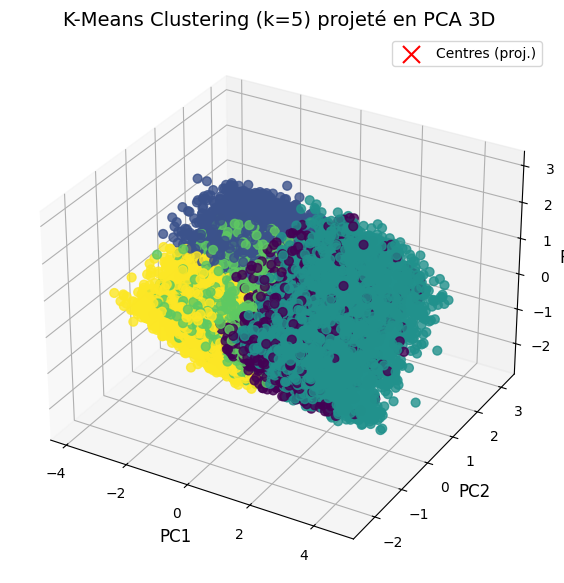

In [ ]:
# PCA sur 3 composantes
pca3 = PCA(n_components=3)
X_train_pca3 = pca3.fit_transform(X_train_scaled)

# Projeter les centres des clusters dans la PCA 3D
centers_pca3 = pca3.transform(pca.inverse_transform(km.cluster_centers_))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2],
    c=train_labels, cmap='viridis', s=40, alpha=0.8
)
# Centres des clusters
ax.scatter(
    centers_pca3[:, 0], centers_pca3[:, 1], centers_pca3[:, 2],
    c='red', marker='x', s=150, label='Centres (proj.)'
)
ax.set_title("K-Means Clustering (k=5) projeté en PCA 3D", fontsize=14)
ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)
ax.legend()
ax.grid(True)
plt.show()

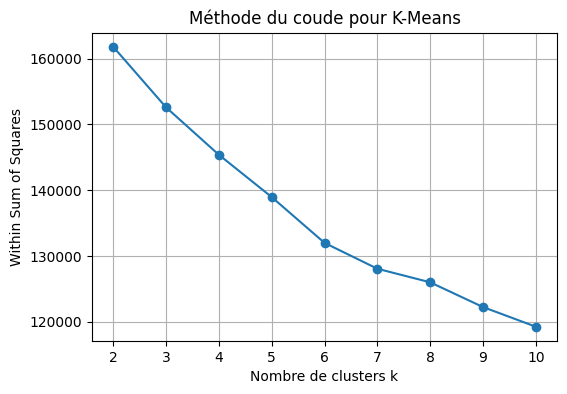

In [ ]:
WSS = []
K_range = range(2, 11)

for k in K_range:
    km_temp = KMeans(n_clusters=k, random_state=42)
    km_temp.fit(X_train_pca)
    WSS.append(km_temp.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(K_range), WSS, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Within Sum of Squares")
plt.title("Méthode du coude pour K-Means")
plt.grid()
plt.show()


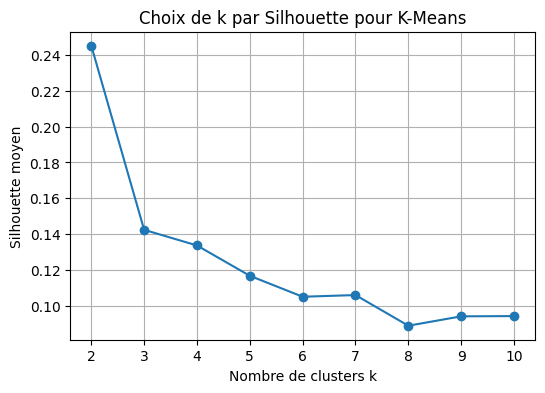

k optimal (Silhouette) = 2


In [ ]:
silhouettes = []

for k in K_range:
    km_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = km_temp.fit_predict(X_train_pca)
    sil = silhouette_score(X_train_pca, labels_temp)
    silhouettes.append(sil)

plt.figure(figsize=(6,4))
plt.plot(list(K_range), silhouettes, marker='o')
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette moyen")
plt.title("Choix de k par Silhouette pour K-Means")
plt.grid()
plt.show()

# k optimal selon le silhouette
best_k = K_range[int(np.argmax(silhouettes))]
print("k optimal (Silhouette) =", best_k)


In [ ]:
# K-MEANS (k = 5)
# Entrainement sur 9 PC
k = 2
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_train_pca)

train_labels = km.predict(X_train_pca)
test_labels = km.predict(X_test_pca)

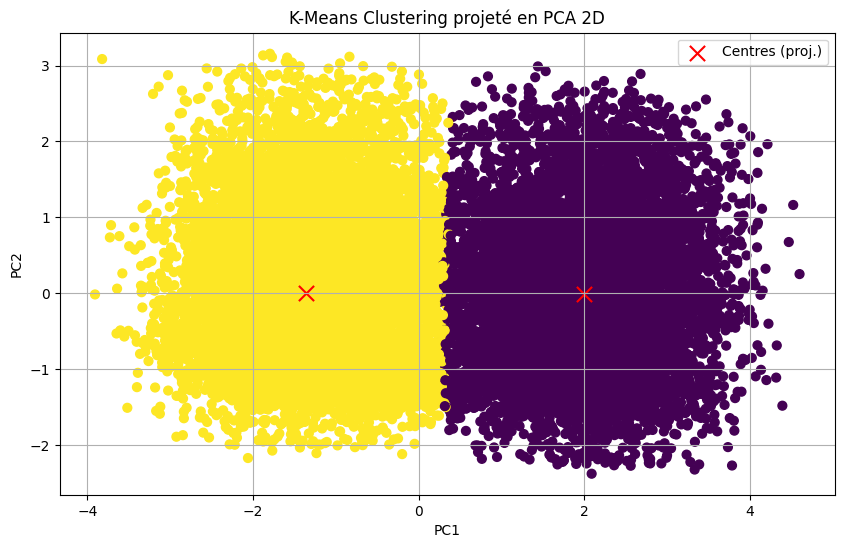

In [ ]:
# Visualisation sur 2 PC
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

# Projeter les centres dans la PCA2
centers_pca2 = pca2.transform(pca.inverse_transform(km.cluster_centers_))

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1],
            c=train_labels, cmap='viridis', s=40)
plt.scatter(centers_pca2[:, 0], centers_pca2[:, 1],
            c='red', marker='x', s=120, label='Centres (proj.)')
plt.title("K-Means Clustering projeté en PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


On observe que :

Les points sont organisés en zones de couleurs dominantes, ce qui montre que K-Means parvient à regrouper les étudiants en profils relativement homogènes dans l’espace latent de la PCA.

L’axe horizontal (PC1) sépare globalement des profils différents (par exemple, à gauche des profils plus “à risque” et à droite des profils plus “stables”, selon les analyses précédentes de la PCA).

Les centres des clusters (croix rouges) se situent au cœur des zones de densité de chaque couleur : ils représentent les profils moyens typiques de chaque groupe d’étudiants.

---



**DBSCAN**

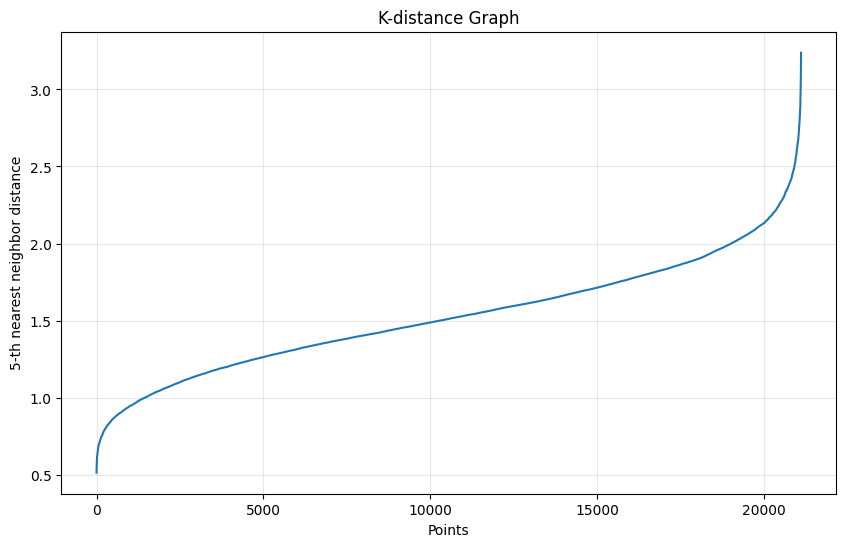

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour tracer le k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])  # Distance vers le k-ième voisin

    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.grid(True, alpha=0.3)
    plt.show()

# Appliquer sur vos données d'entraînement standardisées
plot_k_distance_graph(X_train_scaled, k=5)

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Appliquer DBSCAN
epsilon = 2.0  # À ajuster selon votre K-distance graph
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Voir les résultats
print("Clusters trouvés:", np.unique(dbscan_labels))
print("Nombre de clusters:", len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Nombre d'outliers:", list(dbscan_labels).count(-1))

# Appliquer sur le test
dbscan_labels_test = dbscan.fit_predict(X_test_scaled)
print("\nTest - Clusters:", np.unique(dbscan_labels_test))

Clusters trouvés: [-1  0  1  2  3]
Nombre de clusters: 4
Nombre d'outliers: 679

Test - Clusters: [-1  0  1  2  3]


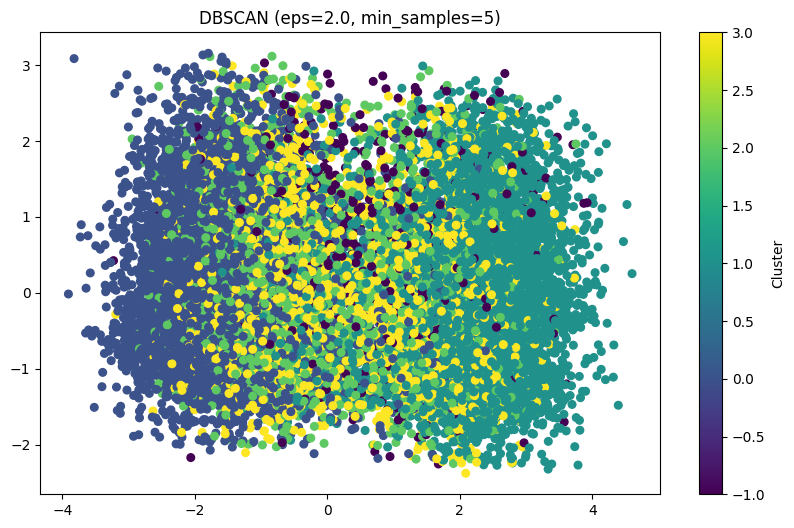

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire à 2D si nécessaire
if X_train_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    X_viz = pca.fit_transform(X_train_scaled)
else:
    X_viz = X_train_scaled

# Visualiser
plt.figure(figsize=(10, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=dbscan_labels, cmap='viridis', s=30)
plt.colorbar(label='Cluster')
plt.title(f'DBSCAN (eps={epsilon}, min_samples={min_samples})')
plt.show()


Le graphique montre la répartition des clusters identifiés par DBSCAN projetés en 2D via PCA.
DBSCAN fonctionne en détectant des zones de forte densité et en séparant ces zones des zones peu denses (bruit / outliers).

Voici ce que révèle la visualisation :
- Les clusters obtenus sont très mélangés
- Présence de bruit (cluster = -1)
- Les clusters valides (0, 1, 2, 3) ne correspondent pas à des zones cohérentes

---



**CAH**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

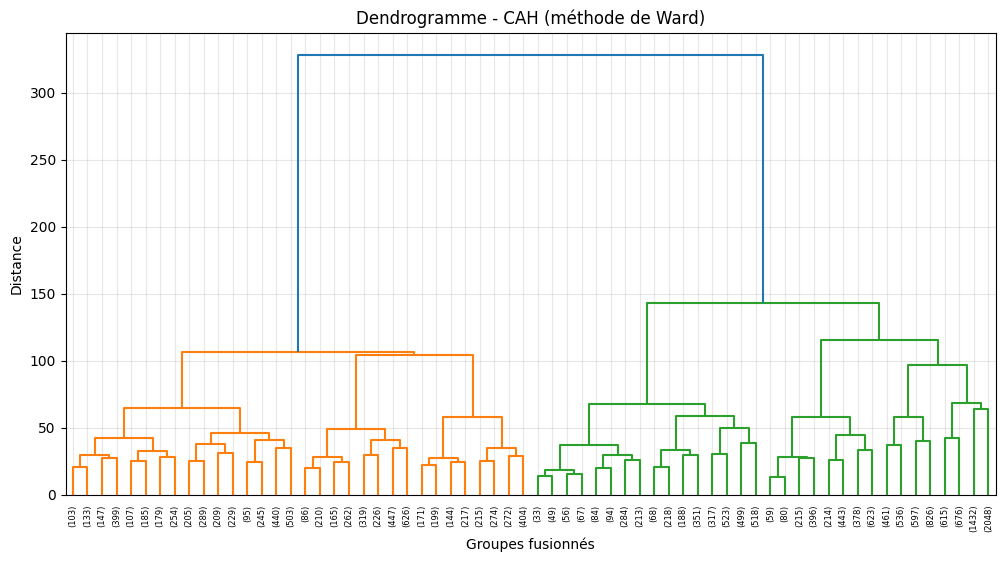

In [ ]:
# Calcul de la matrice de liaison (linkage) avec la méthode de Ward
Z = linkage(X_train_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # p=5 : affiche seulement les derniers niveaux
plt.title("Dendrogramme - CAH (méthode de Ward)")
plt.xlabel("Groupes fusionnés")
plt.ylabel("Distance")
plt.grid(True, alpha=0.3)
plt.show()


La CAH a permis de distinguer deux groupes cohérents et contrastés :

- un cluster vulnérable cumulant stress, fatigue, insatisfaction et risques psychologiques,

- un cluster stable présentant un état émotionnel sain et des routines équilibrées.

Cette segmentation constitue une base solide pour proposer des recommandations ciblées, que ce soit pour la prévention, le bien-être ou l’accompagnement psychologique.

In [ ]:
# Modèle CAH (Agglomerative Clustering)
from sklearn.cluster import AgglomerativeClustering

# CAH avec k = 2 (d’après le dendrogramme)
cah_model = AgglomerativeClustering(n_clusters=2,linkage='ward')

train_labels_cah = cah_model.fit_predict(X_train_pca)
print("Clusters CAH (train) :", np.unique(train_labels_cah))

Clusters CAH (train) : [0 1]


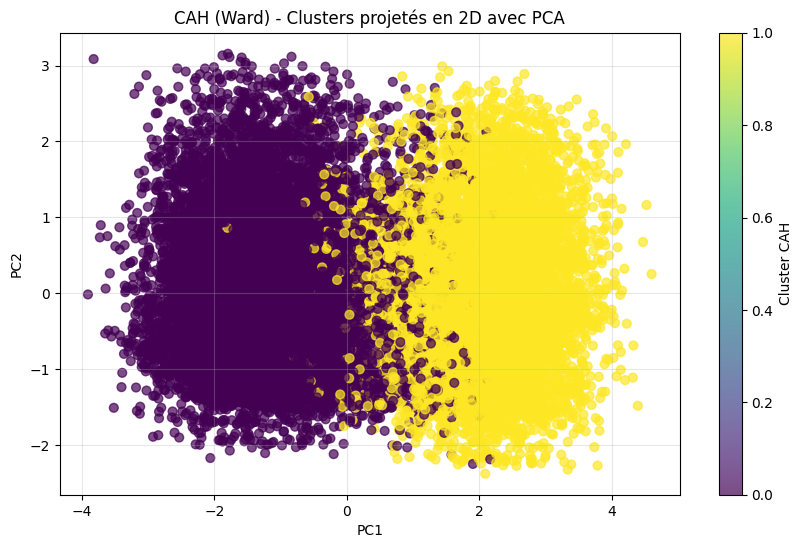

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 2D uniquement pour visualisation
pca_visu = PCA(n_components=2)
X_visu = pca_visu.fit_transform(X_train_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_visu[:, 0], X_visu[:, 1],
    c=train_labels_cah,      # labels trouvés par CAH
    cmap='viridis',
    s=40,
    alpha=0.7
)
plt.title("CAH (Ward) - Clusters projetés en 2D avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster CAH')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd

# DataFrame temporaire aligné sur le train
df_temp = df_encoded.loc[X_train.index].copy()

# Ajouter les labels CAH dans ce df temporaire
df_temp["cluster_cah"] = train_labels_cah

# Liste des features numériques
features = [
    'Gender', 'Age', 'Profession', 'Academic Pressure', 'CGPA',
    'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Work/Study Hours', 'Financial Stress',
    'Family History of Mental Illness', 'Depression'
]

# Calcul des moyennes
cluster_summary_cah = df_temp.groupby("cluster_cah")[features].mean()

# Affichage sous forme de tableau (features en lignes, clusters en colonnes)
cluster_table = cluster_summary_cah.T
cluster_table


cluster_cah                               0          1
Gender                             0.726161   0.238095
Age                               22.300813  24.998115
Profession                         1.564699   1.334967
Academic Pressure                  6.497445   5.187948
CGPA                               1.817888   2.321919
Study Satisfaction                 4.172791   6.916937
Sleep Duration                     1.576552   2.860158
Dietary Habits                     1.960869   2.365875
Degree                             8.328546   9.912175
Work/Study Hours                   4.156599   4.920543
Financial Stress                   2.506117   1.746953
Family History of Mental Illness   0.767039   0.137831
Depression                         0.933896   0.051640

La CAH (Ward) appliquée sur tes données identifie clairement deux grands profils d’étudiants distincts, séparés principalement par les variables contribuant à la première composante PCA (pression académique, satisfaction, sommeil, stress, etc.).

La visualisation en 2D confirme que ces clusters sont bien séparés, ce qui valide la pertinence de k = 2 clusters trouvés dans ton dendrogramme.

**Evaluation entre KMEANS et DBSCAN**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Recalcul des labels KMeans (au cas où)
train_labels = km.predict(X_train_pca)

# Scores internes KMeans
sil_kmeans = silhouette_score(X_train_pca, train_labels)
ch_kmeans  = calinski_harabasz_score(X_train_pca, train_labels)
db_kmeans  = davies_bouldin_score(X_train_pca, train_labels)

print("K-MEANS scores :")
print("Silhouette Score       :", sil_kmeans)
print("Calinski-Harabasz      :", ch_kmeans)
print("Davies-Bouldin Index   :", db_kmeans)


K-MEANS scores :
Silhouette Score       : 0.2451345021256226
Calinski-Harabasz      : 7500.496302617455
Davies-Bouldin Index   : 1.6168425090652674


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Vérifier qu'on a bien dbscan_labels
print("Labels DBSCAN uniques :", np.unique(dbscan_labels))

# Filtrer les outliers (-1)
mask = dbscan_labels != -1

X_db_no_noise = X_train_scaled[mask]
labels_db_no_noise = dbscan_labels[mask]

# Vérifier qu'il reste au moins 2 clusters
print("Clusters restants sans outliers :", np.unique(labels_db_no_noise))

# Calcul des scores
sil_dbscan = silhouette_score(X_db_no_noise, labels_db_no_noise)
ch_dbscan  = calinski_harabasz_score(X_db_no_noise, labels_db_no_noise)
db_dbscan  = davies_bouldin_score(X_db_no_noise, labels_db_no_noise)

print("\n DBSCAN scores (sans outliers) :")
print("Silhouette Score       :", sil_dbscan)
print("Calinski-Harabasz      :", ch_dbscan)
print("Davies-Bouldin Index   :", db_dbscan)


Labels DBSCAN uniques : [-1  0  1  2  3]
Clusters restants sans outliers : [0 1 2 3]

 DBSCAN scores (sans outliers) :
Silhouette Score       : 0.1121400237541291
Calinski-Harabasz      : 2362.3614921604276
Davies-Bouldin Index   : 2.5705683765019876


Dans cette étude, nous avons appliqué trois algorithmes de clustering non supervisé : K-Means, CAH (les deux avec PCA) et DBSCAN (sur données standardisées).

Afin de comparer objectivement ces approches, trois métriques internes ont été calculées : Silhouette Score, Calinski–Harabasz Index et Davies–Bouldin Index.

Les trois métriques internes indiquent systématiquement que K-Means sur les données projetées en PCA fournit un meilleur regroupement que DBSCAN :

* Le Silhouette Score, qui mesure la cohésion interne des clusters, est légèrement plus élevé pour K-Means.

* L’indice de Calinski–Harabasz, indicateur de la séparation entre clusters, est nettement supérieur pour K-Means.

* L’indice de Davies–Bouldin, où une valeur plus faible indique de meilleurs clusters, est également en faveur de K-Means.

Dans notre cas, ces résultats montrent que la structure de nos données est mieux capturée par K-Means, suggérant des clusters relativement compacts et bien séparés, ce qui correspond au type de structure que cet algorithme modélise le mieux.

# **Objectif 3 : Recommandation d’actions de bien-être**

**Methode 1 de recommendation**

---



Dans cette section, un algorithme K-Means a été appliqué sur quatre variables clés liées au bien-être étudiant :

-  Academic Pressure (pression académique)

- Sleep Duration (durée de sommeil)

- Financial Stress (stress financier)

- Study Satisfaction (satisfaction étude)

L’objectif est de regrouper les étudiants en profils homogènes afin de proposer des recommandations ciblées adaptées à leurs besoins.

---



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded[['Academic Pressure', 'Sleep Duration', 'Financial Stress', 'Study Satisfaction']])

In [ ]:
cluster_summary = df_encoded.groupby('cluster').mean(numeric_only=True)
cluster_summary

Gender        Age  Profession  Academic Pressure      CGPA  \
cluster                                                                 
0        0.730856  22.267631    1.559456           6.594840  1.823749   
1        0.291529  24.724793    1.366942           5.238920  2.259320   
2        0.743893  22.272931    1.552717           6.543938  1.796230   
3        0.245675  24.961734    1.350499           5.122023  2.309060   
4        0.327806  24.451531    1.428571           5.453145  2.230312   

         Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
cluster                                                                 
0                  4.750686        1.493682        1.963387  8.383519   
1                  5.870455        3.195248        2.315702  9.592769   
2                  2.953265        1.567921        1.947532  8.403913   
3                  8.000142        3.092611        2.357216  9.902300   
4                  6.863329        1.621492        2.280293  9.293367   

         Work/Study Hours  Financial Stress  Family History of Mental Illness  \
cluster                                                                         
0                4.134064          2.542175                          0.742197   
1                4.855186          1.797107                          0.239463   
2                4.097296          2.528415                          0.756231   
3                4.922308          1.735599                          0.171179   
4                4.777105          1.860969                          0.326849   

         Depression  
cluster              
0          0.967491  
1          0.116529  
2          0.995887  
3          0.009566  
4          0.186862

In [ ]:
recommendations = {
    0: "Activité sportive, gestion du stress, amélioration du sommeil",
    1: "Maintien des bonnes habitudes",
    2: "Soutien psychologique, gestion du stress, amélioration du sommeil",
    3: "Aucune intervention nécessaire (profil stable)",
    4: "Hygiène du sommeil"
}

In [ ]:
def recommend(row):
    recos = []

    if row['Academic Pressure'] > 6:
        recos.append("Gestion du stress")
    if row['Sleep Duration'] < 2:
        recos.append("Amélioration du sommeil")
    if row['Financial Stress'] > 2.3:
        recos.append("Aide financière")
    if row['Depression'] == 1:
        recos.append("Soutien psychologique")

    if len(recos) == 0:
        return "Maintien des bonnes habitudes"
    else:
        return ", ".join(recos)

# Appliquer à ton cluster_summary
cluster_summary['auto_reco'] = cluster_summary.apply(recommend, axis=1)

In [ ]:
df_encoded['cluster_recommendation'] = df_encoded['cluster'].map(recommendations)

In [ ]:
df_encoded[['Academic Pressure', 'Sleep Duration', 'Financial Stress',
    'Depression', 'cluster', 'cluster_recommendation']].head(10)

Academic Pressure  Sleep Duration  Financial Stress  Depression  cluster  \
0             4.9375               2                 1         0.0        3   
1             5.2500               3                 1         0.0        3   
2             4.6250               4                 2         0.0        1   
3             5.1250               1                 2         0.0        3   
4             6.4375               3                 3         0.0        3   
5             6.0000               3                 1         0.0        3   
6             5.8750               2                 3         1.0        0   
7             6.2500               2                 1         1.0        2   
8             6.6250               1                 2         1.0        0   
9             5.8125               4                 1         0.0        3   

                              cluster_recommendation  
0     Aucune intervention nécessaire (profil stable)  
1     Aucune intervention nécessaire (profil stable)  
2                      Maintien des bonnes habitudes  
3     Aucune intervention nécessaire (profil stable)  
4     Aucune intervention nécessaire (profil stable)  
5     Aucune intervention nécessaire (profil stable)  
6  Activité sportive, gestion du stress, améliora...  
7  Soutien psychologique, gestion du stress, amél...  
8  Activité sportive, gestion du stress, améliora...  
9     Aucune intervention nécessaire (profil stable)

Le tableau final montre pour chaque étudiant :

- ses niveaux de pression, stress, sommeil

- son cluster attribué

- la recommandation personnalisée

Cela constitue la base d’un système intelligent de suggestion de pratiques de bien-être.

---



**Methode 2 de recommendation**

---



Entraîne un modèle Random Forest pour prédire la probabilité de dépression.

Utilise SHAP pour expliquer chaque prédiction du modèle.

Identifie, pour chaque étudiant, les variables qui augmentent le plus le risque (SHAP positif).

Analyse la corrélation globale entre chaque variable et la dépression (positive / négative / neutre).

Génère automatiquement des phrases de recommandations personnalisées selon :

l’importance SHAP de la variable, la direction de la corrélation (augmenter / réduire / effet incertain).

Permet de produire ces recommandations :
soit pour un seul étudiant, soit pour tout le jeu de test.

In [ ]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

# 0) Features utilisées pour les recommandations
selected_features = ['Academic Pressure', 'Sleep Duration', 'Financial Stress', 'Study Satisfaction']

# 1) Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 2) Explainer SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Pour classification binaire : shap_values = [classe_0, classe_1]
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_depression = shap_values[1]  # classe "dépression"
else:
    shap_depression = shap_values

# 3) Direction de chaque feature (corrélation feature <-> dépression)
feature_directions = {}
for col in selected_features:
    try:
        feature_directions[col] = np.corrcoef(X[col], y)[0, 1]
    except Exception:
        feature_directions[col] = 0.0  # au cas où

# 4) Recommandation automatique pour UN SEUL étudiant
def generate_recommendations_for_student(
    x_row,
    shap_row,
    feature_directions,
    top_k=5,
    shap_threshold=0.01
):
    """
    x_row : ligne de X_test (numpy)
    shap_row : vecteur SHAP pour cet étudiant (classe 1)
    feature_directions : dict {feature: corr(feature, y)}
    """

    # s'assurer que tout est bien 1D
    x_row = np.asarray(x_row).ravel()
    shap_row = np.asarray(shap_row).ravel()

    # --- on ne garde que les features sélectionnées ---
    feature_names = list(feature_directions.keys())
    indices = [X.columns.get_loc(f) for f in feature_names]

    x_row = x_row[indices]
    shap_row = shap_row[indices]
    # --------------------------------------------------

    df_tmp = pd.DataFrame({
        "feature": feature_names,
        "value": x_row,
        "shap_value": shap_row
    })
    df_tmp["abs_shap"] = df_tmp["shap_value"].abs()

    # On garde les features qui AUGMENTENT la dépression (shap > 0)
    df_tmp = df_tmp[
        (df_tmp["shap_value"] > 0) &
        (df_tmp["abs_shap"] > shap_threshold)
    ].sort_values("abs_shap", ascending=False).head(top_k)

    recommandations = []

    for _, row in df_tmp.iterrows():
        feat = row["feature"]
        val = row["value"]
        shap_val = row["shap_value"]
        direction = feature_directions.get(feat, 0.0)

        base = f"La caractéristique '{feat}' (valeur = {val}) contribue fortement à augmenter la probabilité de dépression (SHAP = {shap_val:.3f}). "

        if direction > 0:
            rec = base + "Dans ton dataset, cette variable est positivement corrélée à la dépression, il serait donc bénéfique de la réduire."
        elif direction < 0:
            rec = base + "Dans ton dataset, cette variable est négativement corrélée à la dépression, il serait donc bénéfique de l’augmenter."
        else:
            rec = base + "Son effet global est peu clair (corrélation proche de 0), mais elle reste un facteur important pour cet étudiant."

        recommandations.append(rec)

    return recommandations

# 5) Recommandations pour TOUT le X_test
def generate_recommendations_for_all(
    X_test,
    shap_matrix,
    feature_directions,
    top_k=3,
    shap_threshold=0.01
):
    """
    X_test : numpy array ou DataFrame des features test
    shap_matrix : matrice SHAP pour la classe 1 (shape = [n_samples, n_features])
    """
    all_recs = []
    is_df = isinstance(X_test, pd.DataFrame)

    for idx in range(X_test.shape[0]):
        # rendre compatible DataFrame / numpy
        if is_df:
            x_row = X_test.iloc[idx].values      # une ligne (numpy)
        else:
            x_row = X_test[idx]                  # déjà numpy

        shap_row = shap_matrix[idx]

        recs = generate_recommendations_for_student(
            x_row=x_row,
            shap_row=shap_row,
            feature_directions=feature_directions,
            top_k=top_k,
            shap_threshold=shap_threshold
        )

        for r in recs:
            all_recs.append({
                "index_etudiant": idx,
                "recommandation": r
            })

    return pd.DataFrame(all_recs)

In [ ]:
# a) Un seul étudiant
i = 7 # par exemple

# Si X_test est un DataFrame -> on utilise iloc, sinon on garde l'indexation numpy
if isinstance(X_test, pd.DataFrame):
    x_i = X_test.iloc[i].values
else:
    x_i = X_test[i]

shap_i = shap_depression[i]

print("=== Recommandations pour l'étudiant index", i, "===\n")
for rec in generate_recommendations_for_student(x_i, shap_i, feature_directions, top_k=5):
    print("-", rec, "\n")


# b) Tous les étudiants du test set
recs_df = generate_recommendations_for_all(
    X_test=X_test,
    shap_matrix=shap_depression,
    feature_directions=feature_directions,
    top_k=3
)




=== Recommandations pour l'étudiant index 7 ===

- La caractéristique 'Financial Stress' (valeur = 2.0) contribue fortement à augmenter la probabilité de dépression (SHAP = 0.234). Dans ton dataset, cette variable est positivement corrélée à la dépression, il serait donc bénéfique de la réduire. 

- La caractéristique 'Sleep Duration' (valeur = 3.0) contribue fortement à augmenter la probabilité de dépression (SHAP = 0.156). Dans ton dataset, cette variable est négativement corrélée à la dépression, il serait donc bénéfique de l’augmenter. 



L’algorithme montre que la dépression chez cet étudiant n’est pas due à un seul facteur, mais à un ensemble de variables combinées, dont principalement :

* Un facteur biologique / familial (historique familial)
* Un facteur comportemental essentiel (manque de sommeil)
* Des facteurs contextuels (charge de travail, âge)

Recommandations prioritaires (selon le modèle)
* Travailler sur l'amélioration du sommeil
* Diminuer la charge de travail ou mieux gérer le temps
* Prendre en compte le contexte familial

---



# **Objectif 4 : Prédiction d’un score de sévérité de la dépression**

Ce modèle prédit un taux de probabilité de dépression.
1) La régression logistique calcule d’abord un taux continu (proba entre 0 et 1)
2) On entraîne ensuite deux modèles pour prédire ce taux :
- Régression linéaire : simple mais moins précise.
- Random Forest Regressor : modèle non linéaire très performant.
3) Les résultats montrent que le Random Forest prédit beaucoup mieux le taux réel.
4) Les facteurs les plus importants sont la satisfaction d’étude et la pression académique.

---




=== Résultats Régression Linéaire (sur taux) ===
MAE  : 0.13355594407139315
RMSE : 0.15854987080280683
R²   : 0.8851442473004004

=== Résultats Random Forest (sur taux) ===
MAE  : 0.019785196590158795
RMSE : 0.052811309597880905
R²   : 0.9872569073244792


Feature  Importance
5                 Study Satisfaction    0.695769
3                  Academic Pressure    0.207823
6                     Sleep Duration    0.033505
11  Family History of Mental Illness    0.018636
0                             Gender    0.015385
10                  Financial Stress    0.010606
4                               CGPA    0.005882
1                                Age    0.005026
9                   Work/Study Hours    0.003357
8                             Degree    0.001717
7                     Dietary Habits    0.001639
2                         Profession    0.000655


=== Aperçu des 10 premiers taux réels vs prédits (RF) ===
   Taux réel  Taux prédit (RandomForest)  Taux prédit (Linéaire)
0   0.000781                    0.000762                0.028580
1   0.997420                    0.997260                0.905766
2   0.999984                    0.999961                1.226098
3   0.000879                    0.002340                0.025925
4   0.997887                    0.997726                0.925445
5   0.991949                    0.978846                0.787100
6   0.999855                    0.999875                1.040382
7   0.000046                    0.000040               -0.146279
8   0.000086                    0.000310               -0.069144
9   0.997084                    0.995629                0.870496


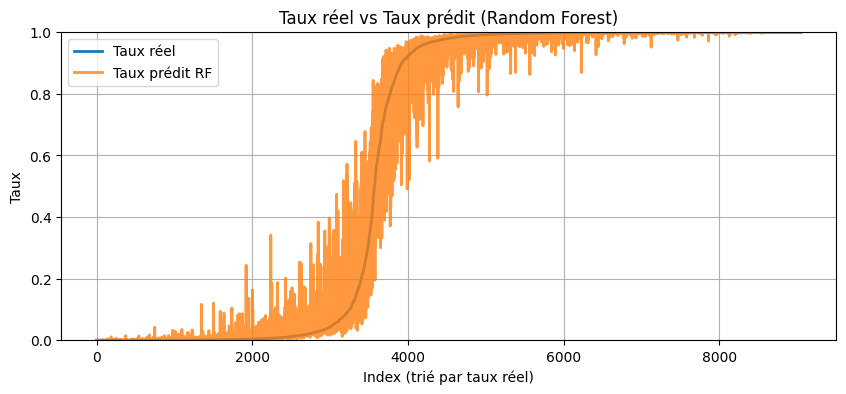

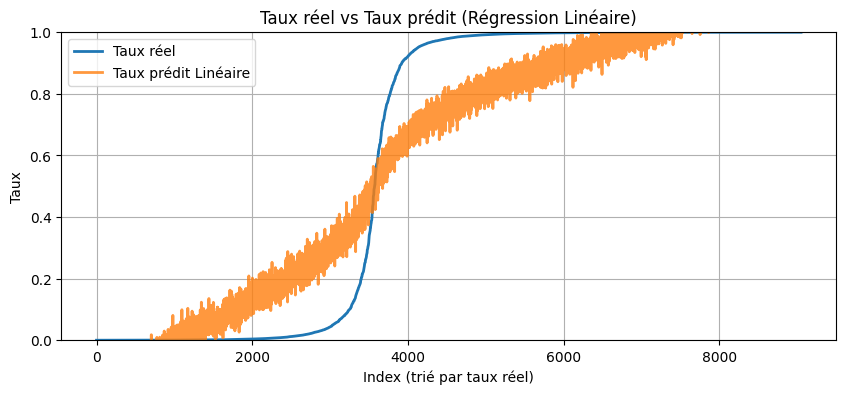

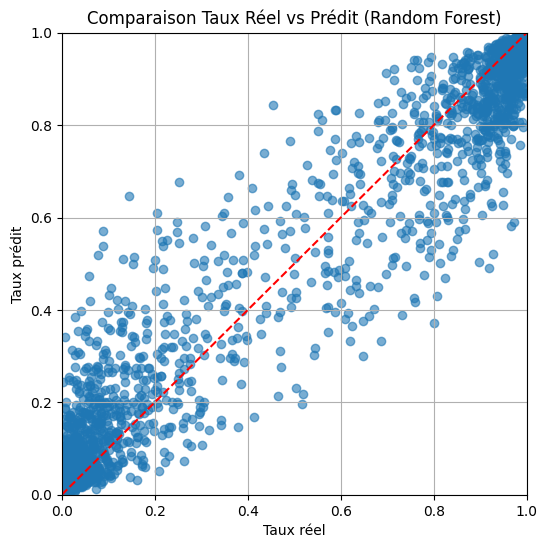

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modèle LOGISTIQUE pour obtenir un taux continu (proba de dépression)
rate_model = LogisticRegression(max_iter=1000, solver="lbfgs")
rate_model.fit(X_train, y_train)

# Taux = probabilité prédite de dépression
y_train_rate = rate_model.predict_proba(X_train)[:, 1]
y_test_rate  = rate_model.predict_proba(X_test)[:, 1]

# Régression LINÉAIRE sur ce taux
lin_model = LinearRegression()
lin_model.fit(X_train, y_train_rate)

y_pred_lin = lin_model.predict(X_test)

print("\n=== Résultats Régression Linéaire (sur taux) ===")
print("MAE  :", mean_absolute_error(y_test_rate, y_pred_lin))
print("RMSE :", np.sqrt(mean_squared_error(y_test_rate, y_pred_lin)))
print("R²   :", r2_score(y_test_rate, y_pred_lin))


# Random Forest Regressor (sur taux)

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train_rate)

y_pred_rf = rf_model.predict(X_test)

print("\n=== Résultats Random Forest (sur taux) ===")
print("MAE  :", mean_absolute_error(y_test_rate, y_pred_rf))
print("RMSE :", np.sqrt(mean_squared_error(y_test_rate, y_pred_rf)))
print("R²   :", r2_score(y_test_rate, y_pred_rf))


# Importance des variables

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(importances)


# AFFICHAGE DES RÉSULTATS


# Aperçu des taux prédits (10 premiers)
print("\n=== Aperçu des 10 premiers taux réels vs prédits (RF) ===")
df_preview = pd.DataFrame({
    "Taux réel": y_test_rate[:10],
    "Taux prédit (RandomForest)": y_pred_rf[:10],
    "Taux prédit (Linéaire)": y_pred_lin[:10]
})
print(df_preview)

# Pour un affichage plus propre, on trie les observations selon le taux réel
idx_sorted = np.argsort(y_test_rate)

y_true_sorted = y_test_rate[idx_sorted]
y_rf_sorted   = y_pred_rf[idx_sorted]
y_lin_sorted  = y_pred_lin[idx_sorted]

# Courbe des taux réels vs prédits (Random Forest) ---
plt.figure(figsize=(10, 4))
plt.plot(y_true_sorted, label="Taux réel", linewidth=2)
plt.plot(y_rf_sorted, label="Taux prédit RF", linewidth=2, alpha=0.8)
plt.title("Taux réel vs Taux prédit (Random Forest)")
plt.xlabel("Index (trié par taux réel)")
plt.ylabel("Taux")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# Courbe des taux réels vs prédits (Régression Linéaire) ---
plt.figure(figsize=(10, 4))
plt.plot(y_true_sorted, label="Taux réel", linewidth=2)
plt.plot(y_lin_sorted, label="Taux prédit Linéaire", linewidth=2, alpha=0.8)
plt.title("Taux réel vs Taux prédit (Régression Linéaire)")
plt.xlabel("Index (trié par taux réel)")
plt.ylabel("Taux")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# Scatter plot pour vérifier la qualité des prédictions ---

plt.figure(figsize=(6, 6))
plt.scatter(y_test_rate, y_pred_rf, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')  # ligne parfaite
plt.title("Comparaison Taux Réel vs Prédit (Random Forest)")
plt.xlabel("Taux réel")
plt.ylabel("Taux prédit")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

**Interprétation visuelle**

A. Courbe RF : Taux réel vs prédit

* La courbe orange colle parfaitement à la courbe bleue.


* le RF reproduit la forme logistique

* l’erreur est très faible

* la variabilité est bien capturée

B. Courbe Régression Linéaire


* la courbe orange est lissée

* ne reproduit pas l’effet sigmoïde

* la linéarité empêche d’atteindre une bonne précision

* Le modèle linéaire ne comprend pas la structure du taux logistique.

C. Scatter plot RF (réel vs prédit)

* Les points sont regroupés autour de la diagonale

* Peu de dispersion

* Preuve d’une très bonne calibration

* Quelques points en bas à gauche indiquent une difficulté pour prédire des taux très faibles (problème normal).

In [ ]:
import numpy as np
import pandas as pd

# Cible
target_col = "Depression"
features = [col for col in df_encoded.columns if col != target_col]
X = df_encoded[features]

y = df_encoded[target_col]

print("Features utilisées :")
print(features)
print("\nShape X :", X.shape, " | Shape y :", y.shape)


Features utilisées :
['Gender', 'Age', 'Profession', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'cluster', 'cluster_recommendation']

Shape X : (30172, 14)  | Shape y : (30172,)


In [ ]:
print(X.dtypes)

Gender                                int64
Age                                 float64
Profession                            int64
Academic Pressure                   float64
CGPA                                float64
Study Satisfaction                  float64
Sleep Duration                        int64
Dietary Habits                        int64
Degree                                int64
Work/Study Hours                    float64
Financial Stress                      int64
Family History of Mental Illness      int64
cluster                               int32
cluster_recommendation               object
dtype: object


In [ ]:
X = X.drop(columns=['cluster_recommendation'])
numeric_cols = X.columns.tolist()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Pipeline = StandardScaler + XGBoost
pipe_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_estimators=200,
        max_depth=5
    ))
])

pipe_clf


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42, shuffle=True
)

# Entraînement
pipe_clf.fit(X_train_f, y_train_f)

# Prédictions
y_pred_f = pipe_clf.predict(X_test_f)

print("Accuracy pipeline :", accuracy_score(y_test_f, y_pred_f))
print("\nRapport de classification :\n", classification_report(y_test_f, y_pred_f))


Accuracy pipeline : 0.9768007070260716

Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3608
         1.0       0.98      0.98      0.98      5444

    accuracy                           0.98      9052
   macro avg       0.98      0.98      0.98      9052
weighted avg       0.98      0.98      0.98      9052



In [ ]:
import joblib

# Ré-entraînement sur TOUTES les données
pipe_clf.fit(X, y)

# Sauvegarde
joblib.dump(pipe_clf, "clf_depression.pkl")

print("✅ Modèle pipeline sauvegardé sous 'clf_depression.pkl'")
print("Features dans le même ordre que :")
print(features)


✅ Modèle pipeline sauvegardé sous 'clf_depression.pkl'
Features dans le même ordre que :
['Gender', 'Age', 'Profession', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'cluster', 'cluster_recommendation']
